In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string

In [11]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /home/cdsw/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [58]:
words = set(nltk.corpus.words.words())

In [2]:
import gensim.downloader as api
model_gensim = api.load('word2vec-google-news-300')

In [3]:

import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [4]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state


In [5]:
column = 'clean_publicremarks'

In [6]:
noun_sentence_df = pd.read_feather('noun_sentences/' + file + '_withembeddings_erros_' + column + '_nounsentences_sentence_embedding.fea')


In [7]:
noun_sentence_df

noun_sentence  count  AVM_Error  \
0                       great mt vernon woods subdivision      1   0.599963   
1           private lot decatur sought-after winnona park      1   0.599905   
2                           inviting central foyer frames      1   0.599905   
3             incredible rear yard w/ limitless potential      1   0.599905   
4                                        geothermal youll      1   0.599767   
...                                                   ...    ...        ...   
1849013                                       combo brick      1  -1.499610   
1849014                 level lots boasts abundance shade      1  -1.499610   
1849015                     straight foyer eat-in kitchen      1  -1.499610   
1849016                           wood storage sheds sits      1  -1.499610   
1849017  end hall master suite double door closets access      1  -1.499610   

                AVM_Error_List  Listing_Error       Listing_Error_List  \
0         [0.5999625012919896]      -0.032455  [-0.032454780361757106]   
1         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
2         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
3         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
4         [0.5997665174825175]      -0.047552   [-0.04755244755244755]   
...                        ...            ...                      ...   
1849013  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849014  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849015  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849016  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849017  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   

        Listingid_List  AVM_Error_Average  Listing_Error_Average  \
0          [210208994]           0.599963              -0.032455   
1          [173286059]           0.599905              -0.025538   
2          [173286059]           0.599905              -0.025538   
3          [173286059]           0.599905              -0.025538   
4            [6952860]           0.599767              -0.047552   
...                ...                ...                    ...   
1849013     [84995269]          -1.499610              -0.533333   
1849014     [84995269]          -1.499610              -0.533333   
1849015     [84995269]          -1.499610              -0.533333   
1849016     [84995269]          -1.499610              -0.533333   
1849017     [84995269]          -1.499610              -0.533333   

        AVM_Error_Indicators Listing_Error_Indicators  \
0                         []                       []   
1                         []                       []   
2                         []                       []   
3                         []                       []   
4                         []                       []   
...                      ...                      ...   
1849013                   []                       []   
1849014                   []                       []   
1849015                   []                       []   
1849016                   []                       []   
1849017                   []                       []   

                                  noun_sentence_embeddings  \
0        [0.013117646, 0.019790076, -0.025902215, 0.003...   
1        [0.020273924, 0.020105323, -0.012676716, -0.03...   
2        [-0.045703962, 0.068157814, -0.055449303, 0.05...   
3        [0.032714177, -0.07150339, -0.07707424, -0.033...   
4        [0.017892806, -0.02443172, -0.0288998, -0.0487...   
...                                                    ...   
1849013  [0.007024779, -0.0017124295, -0.0627071, 0.057...   
1849014  [-0.00205741, -0.06786402, -0.04747214, 0.0546...   
1849015  [-0.0392266, 0.050290033, 0.004388458, 0.05048...   
1849016  [0.032563742, 0.05967781, 0.0041432604, 0.0453...   
1849017  [-0.015119354

In [82]:
def df_lambda_detect_not_words(df, column_name, new_column):
    Lem = WordNetLemmatizer()
    df[new_column] = df[column_name].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if Lem.lemmatize(w.lower()) not in words))
    return df

In [79]:
def df_lambda_remove_punctuation(df, column_name, new_column):
    df[new_column] = df[column_name].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    return df

In [78]:
noun_sentence_df

noun_sentence  count  AVM_Error  \
0                       great mt vernon woods subdivision      1   0.599963   
1           private lot decatur sought-after winnona park      1   0.599905   
2                           inviting central foyer frames      1   0.599905   
3             incredible rear yard w/ limitless potential      1   0.599905   
4                                        geothermal youll      1   0.599767   
...                                                   ...    ...        ...   
1849013                                       combo brick      1  -1.499610   
1849014                 level lots boasts abundance shade      1  -1.499610   
1849015                     straight foyer eat-in kitchen      1  -1.499610   
1849016                           wood storage sheds sits      1  -1.499610   
1849017  end hall master suite double door closets access      1  -1.499610   

                AVM_Error_List  Listing_Error       Listing_Error_List  \
0         [0.5999625012919896]      -0.032455  [-0.032454780361757106]   
1         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
2         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
3         [0.5999051282051282]      -0.025538  [-0.025538461538461538]   
4         [0.5997665174825175]      -0.047552   [-0.04755244755244755]   
...                        ...            ...                      ...   
1849013  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849014  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849015  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849016  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   
1849017  [-1.4996102222222225]      -0.533333    [-0.5333333333333333]   

        Listingid_List  AVM_Error_Average  Listing_Error_Average  \
0          [210208994]           0.599963              -0.032455   
1          [173286059]           0.599905              -0.025538   
2          [173286059]           0.599905              -0.025538   
3          [173286059]           0.599905              -0.025538   
4            [6952860]           0.599767              -0.047552   
...                ...                ...                    ...   
1849013     [84995269]          -1.499610              -0.533333   
1849014     [84995269]          -1.499610              -0.533333   
1849015     [84995269]          -1.499610              -0.533333   
1849016     [84995269]          -1.499610              -0.533333   
1849017     [84995269]          -1.499610              -0.533333   

        AVM_Error_Indicators Listing_Error_Indicators  \
0                         []                       []   
1                         []                       []   
2                         []                       []   
3                         []                       []   
4                         []                       []   
...                      ...                      ...   
1849013                   []                       []   
1849014                   []                       []   
1849015                   []                       []   
1849016                   []                       []   
1849017                   []                       []   

                                  noun_sentence_embeddings  \
0        [0.013117646, 0.019790076, -0.025902215, 0.003...   
1        [0.020273924, 0.020105323, -0.012676716, -0.03...   
2        [-0.045703962, 0.068157814, -0.055449303, 0.05...   
3        [0.032714177, -0.07150339, -0.07707424, -0.033...   
4        [0.017892806, -0.02443172, -0.0288998, -0.0487...   
...                                                    ...   
1849013  [0.007024779, -0.0017124295, -0.0627071, 0.057...   
1849014  [-0.00205741, -0.06786402, -0.04747214, 0.0546...   
1849015  [-0.0392266, 0.050290033, 0.004388458, 0.05048...   
1849016  [0.032563742, 0.05967781, 0.0041432604, 0.0453...   
1849017  [-0.015119354

In [80]:
noun_sentence_df = df_lambda_remove_punctuation(noun_sentence_df, 'noun_sentence', 'noun_sentence_no_punct')

In [83]:
noun_sentence_df = df_lambda_detect_not_words(noun_sentence_df, 'noun_sentence', 'not_words')

In [90]:
len(noun_sentence_df.not_words.unique())

189844

In [89]:
for wd in noun_sentence_df.not_words.unique():
    print(wd)

mt vernon
decatur - winnona

/
youll
/ digitdigit jennair
-
hvac
au
rooftop
approx
mudroom /
john willis
dallas
/ hosea williams
kirkwood
incl
oakhurst
cabbegetown
cabbagetown
howell
greatroom
countretops
appiance
atlantas
...
marietta marietta
dacor
+ decatur
bongers
/ - ups
hbcs
beltline
sw atlanta
- nov
atlanta
creates
leafmore /
/ digitdigit
larte
portch
homecrafters
.
. digitdigitxdigitdigit
ext .
steele
....
/ sq ftg
const winnona prk dist
cambridge
floorplan /
mudroom
+
bonusroom
cul - - chastain
rm / sep
cul - - kids
georgia decatur
- digitdigit
countertops
austell / mableton
pebblebrook
wallace
- french
fpls
victorian
fpl
sep
backyard skyline
lexington
/ brookhaven
/ subzero
/ /
* * dec sq / mrkt
sq ft .
brentwood /
blalock resivior
countertops french
upstais
rehab
- - less
sgl wtr lanier
- / /
rm / fp
decaturs
goto
/ hrdwd
smyrna smyrna
lrg
bdrm flr
cooktop
etc
sheetrock
... beltline
bdrom
hr monitoring .
. /
charlie yates .
floorpaln
smokin bbq
decatur
backyard .
backsplash


/ fireplce
staineless
* info *
summerour
kenmore
customize
carterville
optl
colthorpe
rm / fireplc
/ gargae
favs
bbq
caf
dresden dr
sep /
bd / digitbth
hrdwd
/ - /
rm / digitth bedrm
profes childproof
marta atlanta
alowance
occupied / /
craftman
. - . /
pckge
- digitdigitdigit atlanta
pointe
/ sundeck -
/ / hydra
- / - - -
betz newell
closedigit greenway - beltline - wside reservior -
possiblerental
hvac / hdigitoheater / - newer
marblecounters fitdigit barstools
accessdigit midtwn / downtwn / / hwys / ups
/ bbq
dk . wideplanknew hardwd flrs . .
bedrms
bathrms
- hvac
brookhaven /
euclid floorplan
sara buckhead
redone
cbs
knollwood
johnson rd sits
/ stn mtn
/ mirro
icemaker
/ / bsmt
nero carrera
fridge / / newsecond com fridge
stonehaven
smokin
backyard ...
lvl
roswell alpharetta cherokee
westview beltline westside
cafe
/ - * *
* * /
/ * *
* * * * mudroom * *
* * ctops
brds /
castleberry hil
blackburn
countertops / /
playrooom
brookhavens
, countertops
fpl gr
isonein
carmichael children

stl .
thornberry
niskey /
atty
sw atlanta neihborhood
backyard / - / /
parlour
mt . paran
chastain /
akind
rosemont
estes
beltline greenspace
bolton
atlanta atlantas
brazilian flrs
cvrd
oder
flpn .
designerr .
terminex
georgia / hr
/ / inground
hopkins
judy
ft mcpherson
bfast rm rm
/ bedrm
johns
buford ..
scheduling
- oakhurst
collapsable /
acadmy
/ hardcoat
berkeley atlantas westside
/ travartine
/ alexander
/ jacuzzi +
langford pkwy
bros .
beltlibe
postcard
ambiance
galts
langford
couldnt
woodstove
evans .
hdigitdigit dryer
/ moveable
generac
nieghborhood
decatur / kirkwood / avondale
rm / - -
walkins *
dekalb co - kingsley / ptree /
lvl / ste
backyd *
/ shwr
dstairs
stovetop
backyard - .
verandah
mini /
valdez
westmont
backyard / fl
sep lr sep dr .
vibes
+ + pkg +
ext +
kingston hwy
- digitdigitdigit anderson
washington beltline
hannah
paulee
bthrms
french rm
hardwd
trex
boutiques ...
oakhurst ... / / beltline
hdigito ...
oakland /
/ / / *
zen -
extor bldg / / -
mod /
tennessee
mult

firepalce
/ mable
/ verandah
oconee georgia
digitdigitdigitcall
lawrenceville gwinnett
shoppes gainesville
lakeshore marketplace
mcever
. nicest
airbnbs
. digitrd
ridgewood
saltwater pittman
skyline -
mccall
williamsburg whitlock
flo /
lifestyle johns
hdwds * rm /
lg bfast * rm
builtin systm
* loctd frm
builtns + stne fp * kitch opns grt
walkns * * ovrlooks lg lvl fencd byrd / beautfl landscpng * *
lvng * mst ste
* / amzng
htd
basemt / br / bth
neighberhood
systm - /
flring - / cntrtps - bksplsh - coverd frnt prch - frml - sprinklr
- - rm - bkfst
osborne
campbell
- marietta / smyrna
stonefire
/ hampton
aupair -
florida / floorplan
- sunnybrook
/ - - jill
mega - countertops
keller zeroplus
multi - countertop
/ beltline ashview
/ / backsplash
geogia
spillovers
- rm
marta - digitdigit
hartfield - jackson
newnan ashley
wil
gthe
rockin
/ corian countertops
seminole
inerior
lare
robert greene
axios
siematic
/ addl br /
frplc grtrm
brownsmill
ccos
culdesac ..
canope
/ remore
lakefront cobb
di

- digitdigit lakewood
carrollton greenbelt
/ refin hdwds thruout
vernon /
wg
- morningside
greatroom / masonary -
/ fridge -
- .........
- peachtree ind
frazier bodine -
tlc /
kithcen
countertps - - -
/ - mancave
. digitdigitdigitdigit
valdosta
mayberry
roswell /
digitdigitdigitpm
agenty
/ ctyd
lndscpng
bham
jacuzzi / sep
/ / blt - bkshelves /
gr fab / french drs
bkyd comp fncd
gorg
turkish
gorg hdwd flrs -
bkyds
cooktop / /
thermadore
renov /
lr / bful fplc
newborn
tv rec /
. includs
lg warehse
wyndham
washington floorplan
gwinnett .
. cule
dolittle
- lrge brkfst
rm - - lrge frml rm -
mbr -
unbelieveable rec
wessell
longwood lanier
alpharetta milton
cherokee hoa
diswasher
mudroom enry
renovated - /
mstrs / sittng rms fp .
arnd
digitdigitlcd
- / vac
btful
/ greets
huntington -
financing .
... incl /
- cornhole
netflix
crenshaw
/ / summerhill
bdrm liv
lvl - bdrms
lvl - lr
backdeck
eav -
kirkwood decatur
condo /
harvesting
crossville
atl hwy
rivershore
dbl french backyard
lg bldgs /
digi

terracotta
insidie
/ cdigitdigitdigitdigit
versital
mstr ste / traverine mstr french
prvt fenced - bkyrd
jetski
inground *
sep . .
withh
rome . usda
calhoun rd
floorplan - -
regiter
maintinence
habitad
greatrm / fp
/ jacuzzi / sep
juan
+ rohl
cust dble
sys
ctop + appls
rm fplc
dorsett
uber -
- southlake forsyth
- / . / .
midtown conv northlake
ronov /
- digitdigitdigit / - digitdigit
asko
expansve
neptune
tracy tesmer
manderley
proud galway
internet -
- espresso -
neighborood cul - -
atlanta mercedes benz phillips
/ .....
custer -
extrasplantation
/ mstr br
lrg msrt br + mstr
/ hardwd flrs
dbl vanty
ext / int
showerheads
multi - airbnb
buckhead atlanta
saltwater / /
suntruist .
. digitbr / digitba
leland
flrplan /
rm lr /
appl / cntr - fridge
bcksplsh
sunporch /
* mstr /
* mstr
rvs motorhomes
- - yourselfer
hoa jacksons
/ / / / / appl .
middleton
- . / /
* - - digitdigit
/ lanier ....
morningside tudor
mstr br dbl drs
mstr -
messiers
/ suv /
faye bsmt
/ midtown atlanta
beltline washing

livingroom /
jayden
abuzzin
rm addtl bedrm
. upstairsspa ste
hyatt
dinign
/ theatre / sep / rec / sep / / /
tuscany /
/ cstm / /
rm / sep / fp
fplc . / sep /
. hvac .
. pvt
corbin
rm . mstr / - incloset
+/-. digitdigit morrisbrandon /
. dr / french
. ktchn /
. cp
garmon texas
qtrs /
fab frpl .
jefferson ...
waterfrt
pittsburghs
hampton - beecher
prestigous cumberland pointe
/ - kids
app /
oakhurst resturants
/ digitdigit xdigitdigit /
midtown skylines
+-
- floorplan /
- - lakefront lanier
decatur / winnona elem
* * - * * * * - * *
- odigitw
lanierland
- apps
digitbedrdms
sep lr / dr /
. multilevel
. digitbd / . digitba
atlanta westside - tyler
roams
lr / dr combo
veg
atlantas quietest
phillip shutze
ovrszd
decatur nhood
ct decatur
dr wesley
carroll carroll douglas
/ / / / br /
/ - digitdigit
lrg mst ste /
opn rm / fp
dazzlng dk hdwds
/ closts
islnd
blk frm
osizd opn / finest appls /
cdsac
beaut neut decor
fncd bkyd
heatd flrs
cust tilewrk
sep / / ofc
xtra +
owndws
backyard bi -
kirkwoo

rv / grg
grg *
/ fenced - backyard
giganatic
- homebuyers
countertops apps
- digitdigit / - digitdigit
rm / childrens
spillover
buice johns
ensuite *
bayfield
kallista
digitdigitdigit - -
- pedilstal
hw fls
lg - mnt
sep . entr
hyde norcross
anne sits
adairsville elem
occupied /
ashford /
//
ft / / /
/ connects
coweta / northgate
belleterre
. gourment . / / / . .
hamilton ...
berckman
upholds
wehadkee
oconee greenspace
terr lvl / digitnd
/ stackable dryer
/ / / / / /
enrty
insltd
digitdigit - digitdigitdigitdigit - - digitdigitdigitdigit - .
andtennessee .
rv * *
incl irrig . instr
shoppes riverdale
kingsdown
brookwood cul - -
lvl lg
mastr
atlanta cdc
- cpt brs
lyman
- lifestyle
backyard / playset .
lagre
rm / . addl . ste
bunkroom ste . .
. / addl
lidl
deadbolt
suntruist
countertops carrera backsplash
intelliturf
bd / kennesaw
kennesaw - digitdigit
cherokee co .
- / hottub
/ - - - thru -
diy /
gordon rd /
/ digitbath flordia
inact lic agt
multigenerational airbnb
pullouts
opn / appli r

.. chatt
+/
/ subzero /
glaore
/ fivestar thermador cooktop -
sqr
. digitdigit woodstock
french gothic
featrd grt prk
renov / finest crftsmnshp
kitchn / grnite
hrt flrs
multi - homesites
fenway -
daka appls
/ digitnd hvac
/ - ensuite / jacuzzi
customize /
beaucoup
bsmt / frplc
/ hrdws thru -
weslyan atlanta
privatefull
romatic
bedrms / updatd
subd / /
french mst bdrm
higland
mainenance
ashland ii
xlarge / barstools
chamblee / brookhaven
athens oglethorpe
vanderlyn
proch
greenspace french
/ shecave
/ cherrywood
bldgs /
wraparound / lg
mstr br / lg
/ + ac
mcdonoughs - williamsburg
sf incls
gamer
addtnl rms
fl / / xtra
/ bball
desiner
foxwerthe
carerra /
prfessnal lndscap
hdwd - flr kitch
lg wlk -
crwn mldng / chairail
hvac srvcd / wrrnty
surfc vnty
fnshd sep bsmt br / fullba
crpt / >
/ lg wndws
mstr / wndw
/ cathedrl ceilng
hardi - paintd >
brs / wndw / builtins
blk / appl
managable backyard
sunrm expands *
lakefront *
rm / frplc +
renov / countertops
- courtyd /
thermolpane
sqf incl
/ b

/ hardscapes
/ / rv / etc
wellstar jim
pricepoint
/ daylite
playset kids
- mcdonough
digitdigitrd
carrollton newnan
rm / cstm -
/ stackstone
appartment
- . / kitchenaid
brazilian wd flrs
fr idigitdigit
stne
frankbetz brookwood
digitpm / digitseller
neigborhood
dunwoody cc
appl ctr
mstr / fp
br / rec /
/ . bathw / sep
. applces .
harynes
lrg / frpl
lrg det
digitbas . - /
- digitbds
. - flrs
brs - .
br - /
- april
olympic - -
john wieland olympia
alta
glamor
anyones
acreas
bdrms hugh
fank lloyd
- pullout - -
dbl - / /
rv @
fpcl
idigitdigit peachtree
homweowner
calacatta countertops
jenn - app
ckg
/ konticki
/ oconee
/ / wic
arvida /
wonderfull
worthington
fls * -
lv rm *
rm / * countertops
* sep rm
vlt rm
/ brd
callaway marietta
mableton marietta
atlanta beltline chattahoochee
/ stnlss appls
shwr . bsmt / br
- . mstr / clngs
mstr . trav . flr
/ - app / brkfst
mst / fr sunrm
/ uniq flpln -
deluxx
cdigitdigit
/ emory - emory cdc
greets -
avonwood
% nsp downpayment
nsp sits
southmoor
/ cust

cul - ......
chinese
minka
bdrm - -
roswell lifestyle
rv ups
trane /
whitman fischer
digitbrdrms . digitbath
sep . rm .
. digitbr
digitdigit . / .
. ensuite
supra ...
* hwoods
lifestyle * cul - - *
carrera /
amp svc
nborhood
austin elem
emory healthcare
rr
/ sd forsyth
incl rec rm /
/ ductwork
gargedoor
greenway sawnee
sawnee / indian
- walden
- - mstr
/ / - - - /
inc . flrs
privare rd
etc ..............
nicest clearbrook ..
- brookfield
homeg
sep aptmt / /
picketts backyard
ashley - -
lg connects
dtwn woodstock
createtwo hugh
newtown
jamont
slst appl
famile
gl dr . lg rm / fp
. lg mstr bdr /
multi - zon irrig
upgrad
/ lg liv rm
landry rm / rm
lg ste
mstrw / fp
margaret mitchell
- applncs - - - -
gainsville lanier
farmlands
ptree /
digitbays /
. stevens
slalom
/ rv / rv
- / applicances
/ digitbr / . digitba
* roswell * cobb *
northside dr conway dr . -
barnwell
sg northlake
mst / fp
- sidestreet
stonemill
/ fplc /
.. hvac
fulll bsmt
/ sys
decatur sq marta
covs
atl beltline ..... atl be

incl backyard
proximty brookhaven marta
... olde towne
smynings
johns kingston
- lowell
workshp
crc
bdrms + bdrm
sceneray
/ stonecypher
dr . lrg /
loganville / loganville
campcreek mkt
inc . backsplash
backyard / brazilian / / / / / /
baketball hps
usedas
carrera backsplash
liv / grt rm
. / mudroom
kendra
hgtv / -
atlantas sandtown
jerome rosetti
sugarloaf lawrenceville
pye
rd sits
@ backgate westminster
lvl / dbl firepl
cabinitry
prvt /
medlock fernbank
french ensuite
br / - briarcliff
/ ceils
less -
hoa cobb
dec . sep lvg
* waterworks /
* subzero refrig
* refrig
morningside * * / * *
/ / / * / *
* baldwin * * * * dacor
connects french
pls appt
hamilton -
northside dr . / norman askins
buit -
beatiful
/ sep . jacuzzi + . dble
spkrs / surrnd - lrge
/ . appl kitch
lg / . /
frnt coverd /
whire
westminster christian
lik
- peeble
/ french - priv bkyrd
hrdwds / dwn
incl mstr
betz wilson
bridgemill cherokee
beem
entertainmem
wpull
sep / shwr
frt /
beltline stanton
/ digitac +
hvac hdigito
- 

harwdoods
backyard dunwoody
mc honea
pittsburgh pittsburgh
hardiboard
redefines -
woodbury meriwether whitehouse
tlc wanted /
* immac * *
* hdwd * ful
/ * * aprx
sf * sunrm *
. digitdigitdigit + ft . .
/ . - .
lvl prvt byard /
/ dickerson / walton /
peachtree ....
cul - - carrington pointe
devon
westside - -
qualifies fha usda
hvac pryor
architechural
bdrm / digitbath
including -
/ . jacuzzi
augusta
+ / mudroom + / workstation +
stadum
/ newer hvac
. . digitac
highpointe
exqusite culdesac lvl /
hrdwd flrs lvng rm
ammenities -
bk / digitnd rm /
manchurian
digitdigit / digitdigitdigit .
digitbed / / digitbth
* * qualifies
fullerville
/ rec . -
/ . miltona
podcast
backyard - saltwater
maintained - - -
cobb galleria - digitdigit / - digitdigitdigit
/ / / . / bdrooms
. wooten
mastegreat
breafkast
sawnee backyard
. charleston
tpc sugarloaf -
ktch
lg fencd bckyrd
/ rockbridge
coooktop
rm / / dble
bth + - /
finshes
fxtrs
apls ..
facelift shes
optl hoa
james hardie colorplus
/ fp . countertops


/ lg bckyrd
addl bdrm
/ clst / rm / bdrm /
lebain
- nicholson
. lrg yrd . - . -
. digitdigitdigit - .
. . . . - digitdigit . lakefront
loganville awaits
gargage ....
- wexford / roswell
ctr kitch
. furncace wtr htr
covenient xpressways
bdrm ./
equestrain /
siede hasbeen
withone
- hvac -
acc roswell
fax pre qual
cul - - sullivan -
.++
/ digitdigitdigit + ft picketts
bsmt cul - - /
- / oconee
hvac ductworks
stovetops
westend marta
horton -
- fayette
beauitful
/ granet countertop
bsmt / - / bdrms
- - / flr
counstuction
/ hugh
monroe /
/ florida
ensuite / combo
rt milton
ithaca
incorret
sterio /
chasen @ hardscrapple rd
/ ggc / gwinnett / gwinnett
theatrerm
livingrm diningrm
ymca - decatur
outshines
neiborhood
grooming /
french brookfield
desireable duluth
- lawsuite
hvac - -
ola - =
- steele - -
prompton
duluth youll
sq ft celarium
dunwoody vermack /
krog edgewood
/ landscaping / / / / / /
roswells +
bdrm flrs . + + + + + + bdrm . / - .
guestrm /
addtnl bedrms / - - jill
emory / cdc / va


mini *
* senoia sharpsburg
- * redone /
wcobb
rm exclusve .
npoint pkwy -
. cutest sits
permier
bsmt kids
comunity - digitdigit
- - - vinings /
. . - / .
bsmt ..
caesarstone
@ briarmoor manorpool
rm kids
addl mst br
rec bment
kevin - darien -
* * floorplan
oakgrove dekalb
dekalb mtn
hvac emory
hef hvac
kanawha
- / - / / rm
jackson elem
yorktown
pergo - flr dr / lr
monteagle
+ thruout
jocobean flrs
sys +
millridge
mayfair
/ * * * countertops * *
georgia sits
mondo
romatinc
ultralight
houseand
- hw
greenspace / / bfst /
prestine .
/ digitdigityr
bluestar french -
- - ensuite -
cedarcrest rd
thomas coweta
strge bldg /
strge
/ - digithalf -
uv /
/ moore
/ brizo
hiram cobb
- digitdigit / idigitdigitdigit / hwy
bitchwood
- effc hvac
fr dr scrn
+ digitdigitdigit
flrs rms +
- mastr
hahn
pf
possibities
anderson livsey
french terra -
ameridream
orme virginia
/ .. * *
treesa
lakefront saltwater
sustainability
duluth /
cle backsplash
trendy /
marche
dulce vegan
pvt bckyrd
appreal
lg bdrms prvt - -

payne . lg rm / fireplc
neighbrhood * newr
magnificant lanier
breakest
. inc .
riverwalk ymca
- laminant
cartersville cedartown
morningside jackbilt
huntley cul
gorg bckyard
.. lvl / bd
eleg grt rm / frpl .. fr drs sunrm
flrs ... fab yd / frpl
bful hws
glenwood floorplan backyard
french - /
lassiter cobb
breafastfast
jonesboro spivey
digitdigitdigitdigitdigitdadigitdigitdigita
opprtunity rennovation
cul - - / hoa
hdwds sep lr
wifi amp
bandon wildwood
riverbend
/ stacked -
brookhaven / ashford /
broadwell
sep . shwr * *
floorplan jr .
effcnt
drybelow -
maintained . adjoins
snellville . brookwood
chestatee .
grt schls /
pvt flr pln hge fncd yrd
mst ste / hge clst
grt rm / entrtnmnt cntr
/ wlk pntry
parkview * / -
rms / rm
. treehouse /
sep . / mudroom - digitst . . orig
- . lg
rm addtl
lrg brk
cobb pointe
ol .
nhood / /
rheam
fayette ..
john neumann /
/ - / / fp +
lg / / -
michael etchison rd monroe
/ bnb
/ superbowl
olde conyers - digitdigit
- - - - crete
- appl - - -
- - bldg - -
fonta

tallassee
athens / jackson
. walton cty
ensuite / jacuzzi
hrdwood
ofc /
possibilites .
mudroom wih
billard rm
btlf
pvt inground
. - . - /
airpor
opporunity
bathrms rm
hm incl
mstr bathrm /
bsmnt inground
/ stewarts crk
hwy . digitdigit
dr * gr stn fp
tstats * - / cmty
exec / digitdigitdigitk fab *
- bkyd / firepit
* stdy / frnch drs + lr
pdr rm *
blt - bkcases *
shwr surrnd * bsmt
pella hunter - douglas
senoya
bds / digitba / -
. digitdigit carrollton
ir
/ - creates
- - floorplan /
- buckheads sarah
- - buying
stckd /
digitbr / digitba - digitdigit
multilevel - - -
brs - -
mstr - int - / - blt - /
lr / famrm - / - terazzo
hardcoat / cul - - /
appreciates ...
* rm * bkyrd *
inlw ste *
* fp *
emanates
/ stained -
trane hvac .
frnt bk
neighborhhood /
lifestyle youll
firepoace
fl / fls . /
hm / / pvt rv . . /
dntn roswell /
mr / mrs
- - / combos
fanstastic
. landscaping /
unfshd bsmt
freeform
lr / fp /
lvl rm / pvt
marietta wellstar kennestone
backyards cobb
cooktop +
/ chatham
berkeley cc

/ havc
cabintrey
bethesda / /
backyard / fp
digitdigit / digitmiles
lawrence
lr + dr +
accesnts
perc
milton cul - -
- cabrio dryer
ethernet tv
digitdigitdigitdigitdigit digitwd
kubota rtvdigitdigitdigit ...
* * sep * lg *
adair * *
- digitdigit hoa
livrm /
hardcoat / / inground
backyard deerlake
waterheater .
enterntainment / commerical
bsmt / bedrm / bth
/ chery
rm / hrdwds
% hardie
digitdigitdigitdigit + . sqft
bev fridge kegerater
bertazzoini
- - backyard -
persian
rec / digitth
gameroom / -
moveable /
- gorund
br - - -
marta decatur * *
digitbr / /
/ / / - .
thru - / /
furance / hepa
riverwalk *
gwinnett dist
morningview /
douglas nsp
@ sq
hvac - lvl -
ext / int * pella * *
lithonia *
breafast
brs / rm addl
huntwick
hardiplank . digitbr / . digitb
pinewalk / nhd
backyead
backyard reno
whoopsie ...
- rosemont
adams * hoa
aia
bd / . bth / sq . ft
sp dr
/ buford hoa
chattahoochee natl rec
eav / decatur / kirkwood
/ countertps
nhood thur
leland cypruses
digitdigit / digitdigit - digitp

dr .. xlarge
/ . dr
sawnee dr
tuesdays taylor
jeffereson
ft lakefront
hwydigitdigitdigit northpoint
throughot
cul - - - brandon elem
lndscpd bkyd
- lvl - huntley
preapprvl ltr reqd
. sq
. silestone countertops
. . grayson . . grayson
harddwood
. ext /
backyard awaits / bbq . .
madia
- carrollton
. theatre / . dolby
/ barrett pkwy - digitdigitdigitn
/ digitbths
bckyd bkfast
adjoins mstr / dbl
bds lg
bsmt cul - -
tom fazios . ives cc
hilton
+ inground hoa
financing /
flr . lrg / . lvl
tuscan italian
glenstone
ac priv / - ste lvl * incl
ste * /
bckyd * /
appl * rm
picketts lvl
* frml lr / * addl rm * lvl
preston .
- digitdigitdigit - digitdigit marta
astoria
hamilton subdv
lifestyle / - pooll
/ incl dble
countertop / workspace
swimm
wh /
stanless applicances
ashford elem sch
+ pation
renovaiton
/ . charleston -
adora
- digitdigitw
. eng
floorplans sits
monroe .
/ . livsey
+ custon
hoschton / braselton
+ morrer
sears / kenmore
. cntrtops
lavista .
porential
frountporch
kids canplay
refrig 

inc . -
backyard . gwinnett idigitdigit
slepian
. adjoins .
apalachee clubview
bth sits lg /
dirve
carppet
int . .
/ - barbeque /
/ lghts
rochester
incl ude
su uite
shawn @ bpmetro . com quickest
. gr . . digitdigit
lrge mster
postcard cul
wtih /
rezoned - atl -
- cambria
chattahoochee suwanee
vancouver /
dresserwith
- virginia
anderson /
- beardslee
atlanta expo
- rms / -
flexiblity
trelawney
ft seawall
appli . lrg mstr / wlknclst . frml rm
. - . hrdwds . /
sunrm / - yrd . dlt bsmt / .
sep liv rm . rms . gr
decatur medlock
hardwoo
digitbd / digitba / digitbah
hardenville
. addl spacous
clayton greenway
manous
muss ...
florida greatroom
gr / hrdwd flrs
westwood beltline
awaits rehab
jacuzzis
... dixon
lg famrm fp
brookwood countertops
rm ....
familyroom fp
/ rec fmrm
culdesac roswells
edenwilde culdesac
penhurst
/ / newnan fayetteville
bd rms .
ould
grillers
- hiking /
lr / dr combo sep . rm
lrg . .
ballisters *
sherle wagner
thruout hrdwd flrs
. daylght bsmt
- dekalb /
lcd hdtv
waterl

hj
von mehren
/ incl / /
fp seperate dr
/ digitdigit - digitpm
... avondale
digitbedrm / . digitbth
marietta idigitdigit / idigitdigitdigit
brickton
ez oakhurst
decaturs oakhurst ..
greenspace backyard
- hamilton .
cdc decatur .
fncd prfct jacuzzi
. . prvte
prestigous northforke
fncd . + bsmt . vltd
dahl
subd / svc
corian / /
flr liv /
................. ...........
betz - blenheim
ctops . countertops
rms . / stainls appli
flrg . priv . xlrg .
digitdigitdigit / northpoint
lg mstr ste / priv
bermuda / /
+/- sq
dr * mstr *
ofc *
sunrm * hdwd flrs * vltd
rm * priv bdrm
bkyd * * *
basmnt rec rm
rm / digitnd . olooks priv
murphey -
sheffield wfhs
kirkwood / eav /
applachee
suwanee suwanee greenway
reveals lg
elijay /
backyard / - japanese
agnes scott decatur
ashby marta washington
whitlock barrett pkwy
cntrs appls
ansley smyrna
todd prichett
- berkshire
subzero refrig /
incl theatre
laminat
etc * * * *
hardcoat .
/ chalkboard . -
/ blk
haynes nhood
beaut lr
expandable / -
. lg . /
doubleshow

digitdigit - digitdigitdigitdigit - digitdigitdigitdigit - digitdigitdigit - digitdigit - digitdigitdigitdigit - digitdigitdigitdigit - digitdigitdigit -
motorcourt
castlewood / buckhead
brich /
terr lvl / rm / -
/ bristol
br ./ -
sq ft approx .
fayette fayette jonesboro
- refrig .
theatre / digitdigit tv
. - / flrs
expandable addl
sml br
bldgs ..
countertips backsplash
cambrige
jenn - stovetop
/ ksu
- - +
* * * peachtree *
* * - * jacuzzi * sep . *
- / maintained / * * +/- digitdigitdigitdigit sq . ft
outbuildilng
excl bsmt
mstr bathdigit
rm / frplc rm
. emory / cdc / va hosp . kitch /
. / - / .
. br / digitba
rm / fp . hwoods
ashworth floorplan
clostets /
carrara countertop
gr mastr lg mstr
wter
kids qualifies usda fha
/ digitrd rm
. digitdigit smyrna
cul - - choctaw
/ / / / elfa
/ - / flr / / schrock
vivian
gsu decatur
westbrooke /
lakefront morningview
rm hvac
/ dp
sonte
hm / chatham dvlpmnt
roswell / alpharetta *
angie
* * checkout
floorplans /
addl bdr
/ circ
abounds / hardcoat
-

brookfield cc golfcourse . .
topoftheline
addll
ll *
* ext
dunwoody dist
cul - - summerhill
dunwoody waterford
defines buckhead
trombley
* gourm *
betzinman parkplan * ovrsz drs * / blt -
* bsemnt *
mmain lvl / mstr bdrm /
rm / gr
brs / rm
eff ac
sep rm / mudroom
/ / towne
canturbury
saprano
- hollyberry
refin hdwd flrs
hamilton / / . .
jill . / .
/ rec . rm
privacydigit
bd / . digitba affords
bellewood
lovelymarble
pepperell coosa
fenced - backyard treehouse / playset kids
falkirk
claudia
grt / bkfst
elec +
+ marta
mn lvl
faciality lanier shoreline
backsplash kitch / hrdwd flrs
traton
stockbridge conyers
dresen / /
hwood flrs -
/ bsmt -
- digitdigitdigit smyrna
- - disp -
odell
- delivrs
clngs rm
overimprovements =
bkshelves palladian
lakefront / app
-/+
grren
sep lr / sep dr .
- retr
renovated / / / walton
hdw fls
dr keads ktchn
accesibility
buckhead lenox
/ . incl
samsung * - *
/ - lg -
dr . / hrdwd
/ atv dn
arnold / /
cobb dr -
cobb / smyrna
madeover /
hallwys
hrds flrs
peachtree s

bethelview greenway
mstr bthrm
roswell milton
hrdwood flrs thru -
/ nhood .
california stlye
countertops installed -
- workstation /
unfolds
cul - - hardage
flr / bkspash appls
fml . liv / / cus trm
- fytvle
/ basemen
neighborhohood .
incl sq . ft
charleston johns
fixutes backsplash
. appl . pkg
mstr bds
jill utilizes
sits lrg culdesac
...... hvac
/ ... etc ...
madeleine
bkyd / . grt sunrm
. / bths
automation wifi
cassville rd
madison / backyard
culdesac acworth
/ - hoa -
backyard - - jill
bsmt incl br
wildwood @ meadowgate
. digitbath /
pre - . +
vanderbilt /
/ theatre / / / etc
yeager
bascomb elemtary
... dramaitc
jacobs ll
/ / digitdigit digitdigit
diane
northpoint avalon
spurlin
america hartsfields
rm / ofc / french
digityrhome
cul - - - brookstone subd
ste . / -
+ closit
ok lrg /
additionnal
ric
fulton showstopper
/ fpl rec rm / -
appliancies
peachtree residetial
dunwoody ... austin
saltwater - -
* bfast * rec
bh
cul desac
. fnshd
sprinklr sys
wdigitw
digitnd . coordinated
. stain

beltline inman
nellie
appalachians
* * / -
/ kicthen
addl bdrm / / rec
basmnt / inground
rec rm / basemnt /
desireable brandon
lvl mstr
priv dk
bsmt / / - ste
sf incl
/ / rosw pk
mst .
hampton -
* whitaker
- jennaire
reynoldstown @ eastside beltline
. carolina .
ashford dunwoody
april .
english va
fairfield website
.. beltline
atlanta vibe
chattahooche .
millwood
backyard - possibilites
asheville floorplan
cul - - backyard *
rm * / brkfst / rm * mstr
hrdwd *
customization /
alpharetta + avalon
+ acs
cosco
mbath / sep .
mcdonough stockbridge
incorporates - /
csx greenspace
cdc ymca
/ - awaits / bdrm
... prvt byard ... roswell
wlak
hrd wd flrs
mastr -
aberonne
thrgh
mediaroom
sprng / smmr
frnt / bck yrd
stnles bksplsh
lvl offc
bandon
springlake childrens atlantas ellsworth
dist . .
decatur * *
br bns rm
bedr / french
* beautful / - countertops - - appls - - - rm *
rm / fplc * lg
rm * bedrm ste * -
int / ext - / /
towne woodstock
daikin / hv / ac / vrv
cul - - leslie
jenn - lg app
bkyd / 

upgrd ktchn
/ firepl -
/ traveltine /
roswell / alpharetta entertm
emerson .
johns ives
. . idigitdigitdigit
* * lrg priv
digitdigit / digitdigitdigit / / cdc
turnberry southfork
fnshd bsmt bedrm
cobb nhood +
elem + =
+ digitdigitxdigitdigit
showstopper backyard
hogansville georgia
/ briarlake / hawthorne
highshool
petina
eff trane hvac
lg bment
attice
herrell rd
/ pri
sheetrock /
.. johns
/ saturdays
cooktop kitchenaid
digitdigitxdigitdigitxdigitdigit
- / / thermador
dingin rms
hm lrg
/ fnshd rm
stnls aps
glenbrooke /
offeres
custombuilt
cumberland deaton
sweetapple
appliancesall
sutallee
costco tp
refirg
nbhd hwy
/ catherderal clngs
rms - thruout
taylor -
traventine
dekalbs avondalea ^
addl bdroom
flrplan culdesac
edward -
br - ensuite
. chapell
- brookfield cc
guttergaurd
brs upst
lg bsmt / br
sep shwr /
- - whitewater
mstr / blt
crtyard / /
- lindal lakefront /
abounds / culdesac /
rm / frpl .
byard / rm
... - digitdigit
usb /
french kenmore
rm / / - + priv
- - dbl - / sep - br +
*

pdigitrch /
jill / -
formall lr
fireplcae
* * rm
* brazilian flrs *
- stonegate
sep rm - perf
/ -/ /
sugarloaf / - digitdigit
dec . provence
- backyard bbqs
petsafe -
possibilites floorplan
/ cntertps
. bckyd
frontside redone
rnch hm / frnt prch
clg . mstr ste / / flrs
prch btfl
crft rm . shtrs .
/ flrs . sunrm / flrs
fxtures
prvt . updatd kchn / gran .
jill dbl
/ luxuriuos
thhrough
. relocating .
exec / digitdigitdigitk
medias
floorg
cul - - lucious
alpharettas - /
br / apremont
gardern / - digitdigit
builtins . eatin
wity sysytem
- less / digitbr
custon venthood
sidney marcus pk
holmes reno
. hrdwd . flrs
. - . -
bsmt / dr .
+ anytime
hva /
lakefront hampton
montigo
neorest
. hvac <
dr . sunrm . . . /
woorkshop
/ bldg ...
huntcrest
hiawassee
ambiance frplc
bdrms / - bdrms
juliet * * california * *
juliet *
wtr hter
holcomb rd .
bsmnt / / fplc
/ builtn
bd / sep . /
xtra bldg
hotwater htr
allison
batrm
bedrm / lg -
mcfarlin * betz
/ firelpace
backyard treehouse / grantie
cratfsman
hign

/ fp lr
bsmt / incl
- - plbing - drywall - *
cobb pkwy dist
/ blk app .
. . sheetrock
. pickens co .
/ det .
bd . rm .
/ firplace *
dacula *
trane hvac zoysia /
/ brockett
terr lvl / def
sp / hdwds
rec rm / hdwds
homw
medlock subdiv
stewart floorplan
/ / atlanta / beltline
windemere
bdrm / bthrm
tv / spkrs incl
roswell / comm
br . mstr / lrg
. flrs thruout
lrg . grt rm /
kitchenhas
covington neighborhoodwith
. withseparate
. addtnl . br /
cassidy
./ / countertops
appls /. hardwd fls . /
. / / / . basmt / / . smyrna villiage
hardwd . .
fairplay alexander
cambridge beautuful
hardowood
mster / dbl
additonal acerage
scndry bdrms /
flrplan rm
counterisland
upstrs rm /
- digitdigitdigit atlanta rd
. . repainted .
. . cpt . grt . storagein . natu
rnch .
addl brs - / dr
livel
wessex
. bercher
. lovley thru - . rm . / bi frplc
. hardwwood . / silestone counteretops . br . lve .
rm / wndws
/ garnite
coweta newnan peachtree
bdrm / cul - -
dck /
etc fha / va
/ au br
refrig / icemaker / dbl /
pende

counterstops
... northgate
yarbrough dr
cul - - dorset
opes
/ northside / buckhead
sunderland
daylt
rm - / jacuzzi - -
- - - digitceilings
/ mini / / .
backyrd bks .
bdrm / fireplc
br california
sheffield /
* * cooktop * - * * *
* rec * *
ptc / / senoia / fayetteville
muirfield floorplan
yrds /
cul - - jackson schl dist
pleae
backyards hampton
stainlees cooktop dbl
% gwinnett
vieews
lovelist
ctops appls
familr rm
- digitdigit - hrdwds
- frml rm
grt rm connects / rm - /
brkfst / - lrg mstr - mstr dbl
sorohan peachtree
allatoona hwy
bkyd sundance
appl rm -
creates sits
/ sauls
digitdigits digitdigits
copley
raleigh .
chamblees huntley
emory / cdc / midtown / buckhead / /
. + saltwater
backyard / floorplan
conveinient marta
floorplan incl .
gainesville buford
uber /
downtownsmyrna
hedgewoods
mstr - - / fp
backyd / - playset
- * bsmnt /
john wieland -
tmqs winston
culdesacs /
themal
crowe jones
. lndry rm
rm / fireplc accommodates
veggie -
/ mbr
addtl / fp
roswell bldg
alpharetta / forsyth

shoppes belmont + smyrna
denver payton
copperfield -
revovation
digitdigitdigit / marietta
gwinnett closeby
snellvilles oaktree
digitinches
weiland /
* peachtree
statewide
brd /
gainesville forsyth
pulte floorplan
northminster
cobb barrett
rec / builit -
/ og
beyone
/ backsplash / .
/ lg gameroom
- flrpln
rm . french dr
rm . brs / hdrd flrs
brookwood / -
uv westside
handyman - / electricty
gadigitdigit
basemnet /
/ wolfe appls
lrg bkyd -
/ fridge neg
/ digitdigitth
/ sep / .
porte - cochere .
tiful hme / . mstr ste / vltd . overszd clst
buslines
seperate / *
boad
digitdigit . digitdigitdigit
hdwd dr
- + calif sys - - bsmt / + rec / rm -
bkyd greets /
ldscp creates
aquos tv
jefferson tudor -
/ - clng
intr .
thruout bful . digitdigitac /
/ softclose
bmt lg rec rm
shwr / shwr
harrison chastain
gwinnett parkview
dbl cooktop
cresswind lifestyle
rooma
ridgeferry
rm / hdwd flr
hdwd flrs / lrg -
mstr bathrm dbl
/ dbl bathrm
. newer / .
/ / digitth etc *
rm hdwd
vingate
sys .+ schlage
* multi -

bdrms / california
lge / -
digitdigitdigit / wk
digitdigitdigitdigit / mnth
bookcses
minifridge -
mstr br / / sep
extr
/ lawnmower
bsmnt / crt
culs - -
incl sep fridge sep
addtl brs jacknjill
lge / rm /
- backsplash french
oxford -
starrs shcools
english newhaven
/ bboard
comforable
addl tv
stry / hdwd pizazz
webb railyard
bedrm flr
hamilton malloy
onsite /
/ backstairs
frt yd /
lg - / countrs
teenager / -
/ . flr thru -
awtrey .
covenient *
beween woodstock
lindbergh dr .
wyngate @ towne
denny
wesley decatur
* pre -
@ cameron
breadfast
- athens sits
rowg charleston
creston
// italian
/ bd / digitba
- rm - rm /
digitdigitdigitdigit - digitdigit /
backyard / landscaping / / parkview /
/ renovated /
apps / digitwhite
cul - - . . mstr
- clsts . ldscpd
- ernest barrett pkwy
ch james pkwy
hrdwds rm -
elfa stg sys
- familyrm
br / ensuite * *
/ . rec / . / /
woodstock dupree
hardwo
firedside
lakefront lochwolde
co . buford
cobb / wildwood /
graysons railyard
/ / / / wheatfield
br dotes
ktchn 

gregg
backyard customize
/ rm * *
cherokees
lsland
hartsfield jackson marketplace
- / boutique
bful trimwork
landscaped - - - / nhood -
ptree newnan -
- / - int / ext
/ walkin - - hardiplank - - -
. josephs / emory
stocktons
midde
phenonemonal
culdesac amberfield
hdigitdigitheater
gwinnett dstrct
/ cmmnty
- somersby
addtition
digitdigitceilings
dishwaher -
commmercial
. beadboard
samsung french refrig
dbl victorian
elec redone
grden
addtn -
digitwic
trls
playgrnd
comm surpasses
whittier vllg
trex - -
forsyth cul - -
fon
southn screend
brs ... hrdwd flrs
levl byard ... rm
lg / jacuzzi
backsplash ..
agnes scott mak
- * * alpharetta
/ / / backsplash / / / / - /
lndscpd backyard
brd / digitba rm
wilshire .
. . / dbl
barrett -
sidelights french
- digitdigitdigit dekalb - peachtree
ome ellenwood
transportaion
tre
/ lites adorns
mancave bsmt
sweetsprings
combo liv /
lagrange lagrange
renovated - / . .
dlots
mstr / dbl wlknclosts
priv lvl yrd
shadburn
toyo anheuser busch
sep . * *
digitm .
hil

bdrm - dwnstrs
fr mstr bdrm
/ dble mbth *
bth * sep *
hoa cul - -
french porte - cochere
yd . / nhd . . cobb / roswell addr
lrg . digitth bdrm / rm . dr . priv
lrg mstr . rm . sep lr / fr
cobb nhds . bful . newr hvac . newer . .
pvt lvl yd
lakefront conyers
fyr / sep frml dr
acrea *
cul - - wyngate
french greatroom fp
% oct
. - seperate
digitbd +
bsmt / edrm /
showplace . /
backsplash . digitsty rm / -
* * lg harrison dist
.- hvac
ashton greenville
flr / dbl
+ lrge
carrara bth
oac
- - - hoa - alta
- - . digitdigit culdesac / -
- hardiplank - -
tyle + + +
tv + +
hgtvs hunters
/ stor sp
plankboard
reinfocements
upgrd /
jaccuzzi sep .
- - etc
/ transome
digitdigitgun
. comm -
digitba digitba
+ brksfst barr
brkfst rm / french
trailor *
rm mst bd
ez hwys
- mini - /
bdrs .- jill
viewes
firpl
transomes
bdr / digitbath rm sep
nive
rm rec rm
beautybright
bsmt wkshp
- bdrms - bsmt
fp - mstr / grdn
- grt rm / vltd
pinegate /
lavista rd
mstr br / combo
cttop -
thermadore +
/ aplcs
pinckneyville no

rm - digitth bdrm / rm /
wessels dixon
prepaid / orra
boatramps lanier
purgola
grantie backsplash
prvt ent
/ / / / appl
backsplash stained -
youre kansas
vanites .
* corian cts *
undercontract april
majical backyard
addl lg
. seperate dr / lr / . -
dunwoody / .
eastman
ro brkfst
artsy /
starfire -
krion
eastside disctrict
/ ronald reagan
/ fr dr .
sys rm . ste
planataion
rv lanier
graycliff /
fn rec /
porsche hdqts
seperate entrace
rm . bkyard
bdrm / . digitba .
playgd
+ playrm /
appls +
kitch ctrs
- suwanee greenway
frplc + -
* * * / countertops
backsplash * / / / french * /
- def *
gergeous mtn
gr / ceils
terr lvl / rm - . lg br
/ appls + bkfast
england - cul - -
thruout +
superba
cooktop / thermador
andgorgeous
/ beveridge
qualitythis
/ walton -
/ digitst
/ . cecilia
cappucchino /
residentials canterbury
muliti -
rm * rm * ingrnd *
lrg cnr
italian palazzo
floorplans atlanta skyline
woodstock shoppes atlanta
- stonehaven
bedrm / offc
/ . dunwoody
bsmt / ext
countertops . sep
/ playse

accessibilty
sq ft incl bsmt
* lrg / fp
guestrms / prvt
bsmt / rm / recrm / / / bonusrm
tradtional apalachee
belmont .
taylor - smyrna
cravey
/ / - rm
digity
. flpc
appls incl .
/ digithalf
/ sittingrm
cul - - barnes
/ addtl br /
appl / cherrry
braz .
sunrm / *
backyard * - /
appls * lg / - *
puritech
/ / digitth br / ste
- digitdigit cobb
subd talmo
parcial +
closings +
nd + rm
landry /
/ addtl rm
. hamilton
- - bksplah - flr * lwr lvl - ..
* mstr - fp -
flrpln *
* * * fab trad
dr / seplr / famrm / bkfst
bsmt . rm
ensuite bdrm
stry grt /
lge brs
mable amphitheatre
liv rm *
lg lr / dr
/ basemt
corian / countertops
touchups
/ solarroom
lv rm / fp
- hoschton
bethlehem *
heathertonlarge *
enterior .
eligant
rm basmnt
- / brkfast
- - dacula
kichn /
kichn
bsmnt - finshd
chattahoochee greenspace
rm bedrm / bathrm
- bathrm /
bouns
/ - peterson
lr / dr / / / rm
bds - bsmt / bds
digitdigitdigit / mn
outdooor
leylands
culdeac
murdock / hightower /
fayeteville pavillion
digitcar digitsided
/ arch

pvt backyard / lge
rm / lgt
bfkst
lifestyles waterslide
blt hm
/ maintainance
grande john wieland
hembree elem
robert trent jones jr .
numerpark
grt evansdale /
hrdw flrs /
+ * incl
european dr hm
hdcoat hm
/ millwk
hm - milton
stne bksplash
lg bathrm
- ola clearwater pointe
hloors
- malibu hermosa
savannah .
backyard portugese
/ terr lvl /
raventree
cul - /
jason downey
counterpot
wahser
lol fha
- wheelchair -
bathfitters
br / . peachtree
fenced - backyard firepit
digitdigitdigitdigitasf +
unfin addl sq
mstr / dbl -
lunchtime
wt bd
multipurpose / rec
clearview craftman
* * * * sep . cooktop * dbl * * * *
rm / fp * hwds *
agave
@ sugarloaf
john willis berkeley chattahoochee
lvl . hvac
yd / bldg
brkfast rm . vermont
lrge / / appls
. lrg bedrms / ensuite / flrs / -
/ . / tv .
flrs . rm / digitdigitft
lrg - / - /
/ newer / / / architectual
assiciation
bderm
bdrm / bth splitbdrm
decor cul - -
rdigitdigit *
- aftermorningside / va
fortodays lifestyle
french . flrs
fp dinrm
ptc / newnan
cvpc

/ appl . floorplan
- - grnd -
includiong
lv / dn rm combo /
madison yds
bsmt lrg fmlyrm rm
espresso - countertops
brs approx
lowes theatre
hardwds mainl
achitectural
- . sonos
fl mstrs
hdwds . -
cumberland / /
countertops * * *
sugarloaf * * *
weathershield
sheffield subd
ballgames - togethers
milton scool cambridge
gorg lscpe
bkyd / irrg sys
grante backsplash
blcks
dorable
contains ensuite
- dryer combo -
fridge - - - -
. brazilian mb
thurs
northpoint / avalon
rms . lrg . isl . kitchn /
digitdigitdigitdigit . digitdigityr
decor . backyard
ninja
verdi vecchio
- wysteria
. . cul - - /
allappliances
indowntown covington porterdale
privat backyard
. hvac . bedrooom
. throught .
windermeres muirfield
ashland llc . lakefront
ft . motorhome
bsmts ..
wynterhall dunwoody
peachtree ind bld
- digitdigit mth
digitdigitdigit / greenbelt / /
laundty
cali -
countr / bcksplsh
clairmont floorplan lexington
- opn
upgrd frisee * mstr / sitrm
* corian / upgrd jenn - appl
cds / bsmt
. thr / .
rec rm . lan

/ sep - - - - ft -
sits adamson
br / digitba / *
johnson *
backspash *
lvl frnt yd cul
frmd
bths updtd / lght fixtrs
/ hvac etc
- jenn - / paykel
ki
/ digitdigitk + * * *
chattahoochee trailhead - lanier
roswell wexford
european hardcoat hardiplank
doraville / dunwoody - digitdigitdigit
idigitdigit / steve reynolds
digitdigitdigitelectric
thermadore appls
tranquial cul
hurakan
. percect trifecta
princeton /
alexis /
hahnsgrohe *
* european * cohiba * dacor
staine
greenbriar -
rm priv lvl ldscpd yd
gr rm / stn frpl
dlt bsmt /
mstr / whilpl
roswell edigitdigit
epoxy protects
turvey info
/ workspace /
andstone firepit
ith -
bdrms / - / rm
/ . avalon
sellersshort
lvl - + / / bedrm -
. digitba - featuring
woodmont + cc
atl hartsfield jackson
belleterre milton
- + / brs /
dr + br / offc
- pharr
woodstock kennesaw
rm bedrm . bsmt
french sys
- waterford nhood
brittanys
- inlaws
closing -
- sugarloaf pkwy
adams *
subdiv * * hoa * *
digitdigitk digitbd
.. rm / frpl
.. bedrm
* renovd
/ / digitb /

cutest -
digitdigit + fenced
/ . attn
sep / digitdigitdigit coventry
fr / blt - +
/ hardi trad blt centex
tumbeld bksplsh
hdwd flrs +
mstr bdrm / dbl
featherstones
jennaire cooktop
hardwd flrs . tenn fplc . .
- digitdigit boss
brookwood brookwood elem
/ neighborhoodwith
- thruout - lrg / rm
calamar /
* mstr gdn / sep shwr
xtra / bfast
georgian epitomizes
distinguishes
prvt / / / /
dbl . - . lrg
frml . rm / fp .
cbntry . mstr ste
addtl jill
/ aberdeen /
wraparound / /
lg lvl bkyd / / fplc
vltd bdrms
/ / / rec rms
stockbridge / co .
backyard / astro
renov . . rm / . renov . bsmt /
/ / comm . kitch = hrdwds
. mstr bdrm / hdwds
capshaw introduces hamilton
kennesaw mnt
loren - -
digitbdr / digitba . digitsides
/ corian applis
/ . ponderosa
lg incl mbr
bsmt / rec /
prestonwood subd
/ westgate @ chadbourne
ymca vickery
hdigito - /
bdrms / jnj +
saddlewood
/ / rec / / /
ola + +
. james iii
crawford huntleigh
. sys . lvl
spac -
rm . lr . sep
lg / brkfast
digitbd / /
floorplan ivey
gibson
dr . f

lv rm sep dr / rm
mtta . harrison
- largest
/ - bkfst
cmnty
digitdigit / kitchenkeeping
dundgon
/ ipe brazilian
- . roswell
- fridays
.. execellent ..
/ digitth backstairs
highwaydigitdigitdigit
hll
cobb co . roswell addr
weiland trad
hugemud dryer
- wrnty
basmt / rm
stanstead cir
hembree elkins
ruben calleiro
french backyd /
supra @
@ convetion
chafin kentmere
lawrenceville / suwanee
- countertops - hrdwd - / jill -
- bdrm / . -
. digitdigit / fenced - backyard
catdigit wirless
tuscan - / /
thomas rd clayton
opn bfast
lrg mster /
atlanta skylar reveals asiatic
chinese chippendale
cul - - mceahern highschool
sep dng
tubw /
. digitacres -
culdesac . kitch /
/ beauitful
/ - roswell
. thrid
* bsmnt / / / / *
lvls *
frplc * addl lndscpng / ext
hr -
hdwds / / rm / / bkfst
/ digitdigit / / digitdigitdigit / / / /
. digitdigit * duncan
- wieland edgewater
. backyard / . . / / / / .
desireable muirfield windermere .
weiland lg /
trtmts
outdr entert
lg bk / fplc
/ lvl bkyard /
terr lvl incl au 

mancave mudroom
ei /
pm monday - friday
- digitdigitdigit - digitdigitdigit woodstock roswell
wlc
addl info
backyrd . / / sep /
/ - / / countertps
- - ashebrooke / subdiv .
backyard fenced - playset
hdw /
bentwater - - -
/ - - ste
/ playgroundcommunity
lg rec bsmnt + sep
winns
rm rm * bsmt *
nickl
floorpln / fp liv rm
updatd systms
incldg overszd refrig
mstr featg
bdrms / overszd
ridgeview jeh
windsorcreek -
overdigitdigitdigitk
spli
porcfh
backyard / kol
thruout bsmnt
+ aphw
osizd / / rm
digitbr / digitba digitdigitdigitk
fave culdesacs
greatroom / - /
lg outbuildiong
walkin vanitiy
conv - digitdigitn
accomdates
digitdigitdigitdigit digitpm digitpm
- crawlspace ..
/ ensuite .
lanier ......
seabreeze
reflects lifestyle
april wewill
adjoins .
hardcoat / .
windodows
/ closeout *
/ cul - - hampton /
hwy ronald reagan pkwy
gameday / /
- . lr / /
cul - - tr
hewett avalon
digitdigit digitdigitdigitdigit digitdigitam
wifi controld hvac
wifi controld
refin hdwds -
- - - - - redone
atlanta comm

- / hvacs
/ cambria cntrtops /
hme / digitdigitdigit
/ boutiques
* bsmt * btful hdwd flrs *
rm * btiful
lvl br * lg
rm - fp * rm
/ / / bluetooth myq
lg / - jill
multimedia /
/ rec rm / -
thomas -
/ - / - -
- - - lr / / french
adams - premuim
forsyth / fulton
incls / dryer
responce
orig .
backyard terr
- belhaven /
sep frml lv rm
ovrszd brkfst rm /
estblshd /
- buit
/ - less ocee / taylor / chattahoochee
hvac internet
/ hardscape incl
/ annsbrooke
. rm . rm / . sep
rm . . /
buchanan dallas
famrm / blt -
/ / / idigitdigit georgia / gwinnett
/ / backsplash / / / / / / /
/ frnt
[ ]
mcfarland rd
childrens healthcare cdc
brkfst / brkfst
masterba
upstaits
offce / rm
cdc agnes scott
counterspace + - *
- mhs
lvl . priv .
restauarnts ...
ppl
/ moulding / / / / / lg
/ digitdigitdigit / /
- sto
sits cul -
kennesaw sprayberry
saturdays * *
hwy / sr
cul - - springdale
- mba
/ . / ctrtops
digitbdr / digitba
marion floorplan
crafstman -
- kids * * * - % co op * * * *
kitch flr
bdr / digitbath
/ upperd

- digitbr / digitba - lr
- / gameroom / / -
cul - - walkability
ingrnd htd
rm wtih
odwyer -
* backyard firepit *
ingrid
/ grantite /
hd flatsceen tv
youll christmas
aug -
- etowah *
. wful ste
greatroom combo
westwood ..
culdesac / digitdigit +
eastwood forrest
/ dn
calhoun elevationpicture
adac
towne cul - -
homedepot
mirrorwork
/ . digitdigitdigit
addl ensuite
mexican terra
hardcoat . digitdigitk
- conv .
gwinnett brookwood
roxeywood
sys / hdwds
brs / lrg
supra onsite
countertops inc
floorst /
- digitdigit / / beltline
rdigitdigit blew
br / . hm
thruout - flr
gt rm / fplc
. bk yd
richmond loganville
- maintained -
sardis / chestatee
hrdwood . - . rm . hrdwood .
. digitdigit hwy
/ french drs . thruout . -
. bsmnt / . prvt bkyd .
. lrg /
dbl cielings
diplay
hardcoat oakleigh
/ . / digitth
ec weatherstone
idigitdigit / hwy
dble vnity
bedrms / bths
plentty
bd / . digitbth
mstr . / .
/ / updated /
dixtures
rdigitdigit /
bksplash * sunrm / hvac * dr * rm
* / / appl
/ bldrs *
- hdmi cordles

/ digitdigit ft +
pickett - /
thomas - - digitdigit
bth windsor
byard - /
rm - fplan - / dickerson / walton
porce
kenney
kroger jonesboro
digitdigitdigitheated
ensuitebath
fresher
sep bkfst rm
melfrod
/ - - jill bth
cobb lacation
/ belgrade
/ arlo
provia
abernathy greenline
hepa / dryer
buford lanier lanier
/ morningside *
- digitdigit / digitdigit / digitdigitdigit *
* * turrett
turnbridge
/ floorplan +
digitdigitn
petes tiki
salisbury
appt thursdays fridays
storagae
lenox atl
starrs kenton peachtree
palladian +
prestigous john weiland / tennisl
screend - backyard
lg wic
clearwater crftsmans
groumet countertops adn
flloor /
mstr bdrm / lrg - bth /
cul - - brookmont
hadwoods
overszd mastr
lg bedrms *
cnditin *
frml dr / lr * -
- - digitdigit hvac
inc refrig
/ prvt bkyd
clairemont ele / decatur
/ . sep / .
nrw
coweta /
- digitbr / . digitba digitdigit
lifestyle norcross
/ geeat rm /
lr / fpls
hwydigitdigit ronald . pkwy
va dekalb
- - lassister
tumb marb
tstats
esacape
john wieland / ten

cafe appls
digitdigitdigitv digitdigitdigitv
lr / flr
brkfast .
. / multi
+ unfin bsmt
ocee greenway
homeste
resides january
finsh terr lvl / bdrm
/ gr rm / fp
delivers wic
/ / countertops / backsplash /
/ . bsmnt
kitch cntrtops
fab bd /
hm warnty
digitdigitdigit + digitdigitdigitdigit
jere bowden subzero
turbochef speedcook
vacates january
hardieplank creates
overimprovement =
- knollwood
sits gresham .
br / pvt
grdn / combo
- digitdigit - digitdigitdigit georgia
prch brkfst
/ - ownera
bdr / bth cambridge
. mstr / rm / fplace .
/ antiqd
sf / qual
lg rec rmw / / mahog . . surr . rm wkshp .
/ heards
wihen
- jacobean
turkish bksplash
hugh muli -
- digitdigit thornhill
/ racquet mtn
/ silistone
suntrust -
sunrm * fha / va
hamilton bdigit
subdivion
bkyd / perrenials
ste / clngs
rm / clngs
* dr * beadboard
sq . ft ./ /
floorplan smyrnas
lg mstr / walkin
lg extr brs / . digitfaux
incl . . gr / fp
marietta neigborhood
james williamsburg
bsmt / digitth br / digitrd
cofffee
tuscany hsb
metro ba

braeden
woderful kids
lp techsheild
/ countertops / backsplash /
stnlss applcs
/ glss
rm msnry fp
+ poolhse / digitbr / digitba
pnt mrble fyr
* ac / hepa
kia columbus
communte lagrange
huuuge
greenville lagrange
/ ballusts .
backsplash . french
/ appl . incl
steve waldrip
vltd clng
sarsparilla
ashton monroe
- customizations
. bkyrd prvt
/ wtih
grtrm dr
hrs -
westside moore
/ braseltons
- digitdigit / braselton
/ fab floorplan
- sep rm
fab mb / sep
storry
everwhere
cert . /
voc / /
sep . . / cust
english / wkways /
hebron
digitsteps
masterbr / bathrm
bathrm / -
bdrms . digitdigit
- wexford roswell
- summerchase towne
/ hardiplank cul - -
/ . / tenn .
. lrg eatin .
frieza . / digitft .
. mst ste
backsplash / / - rm / - lr - /
brs jill - br / -
digitdigitwxdigitdigitlxdigitdigith
allawance
/ dogwds etc
addit bedrms
/ hdwds mn
. marlo goft comm
hugh mn
/ theatre rm .
bsmt / rec rm / / rm / rm +
stratton floorplan
prvt / prvt
fnshd terr lvl / fplc / rm
/ coventry
. . . / . .
mudrm ...
+ jac

brkst / / fr
dntwn decatur sq
rehab .
lg brk
/ westlake
rec rm / digitnd fplc
lge lvl culdesac
sf +-
georgia / /
bsmt br / rm / digitth
fha / va * /
br / * * / /
dr / digitrd
. . seperate
relaxing . lanier highschool
alexander dist
cul - - mt vernon
jenn apps
workshot
/ / / pavillion /
charlestonesque
fulton roswell
parkview barrett
catherines
occup
ensuite backyard
atl brownwood
cul - - woodstream
digitbd / / digitba
barware
ron anderson rec
* * * ..
* * * - digitdigitdigitdigit sf
roswell litchfield
bdrm homeon
lyndon
buyout
thornebrooke
riverdale jonesboro
- - - + vanderlyn
/ / fb
- fenced - -
tiel backsplash
/ / / br . nkl / / frml
+ . strg . bldg
/ lrg br
newmaster /
showplace peachtree
rbid
/ dwnstairs
expandable ...
coweta grantville
eue - atlanta -
ingrid info
cul - - - avington
macedonia hoa
- / digitnd kitch
updatairs
fayette sits
ensuite dbl /
andover gadigitdigitdigit
peachtree indl blvd
- - kitch / lg
buckhead atlanta skyline
corin backsplash
mcintosh -
* sep liv
tremnts
*

* hdwds upstrs
... renovated . hdwds
* mstr ste / hdwds
frm - digitdigitdigit
reveals european
backyard / . .
digitfrpl
/ . brkfst
firepit . det /
bckyd sys
cared - /
/ paddleboat
marazzi
lg liv rm / frplc
fenced - backyard playset
marlanta
/ howard
plntion shtrs
crwn mldg
john wieland guilford
igl
squ
bella fischer
. lndscpd bkyd / . - .
. lg flr /
towne / inground
vinings swm / tns / / plygrnd / hoa nhood
terraced / landscapd bkyrd
hardcoat / stackd culdesac
upgr lightng
windgate /
/ inclg
.. dryer /
drk hdwds
seconday - -
flr - - -
ensuite / walkin
- westbury
brookhaven / .
sst incl
/ walkin / /
rm lr bkfst
communites hillgrove *
seperate standup
/ - * * /
rec / * * * *
brazilian ...
lr / combo
clawfoot .
themain
barrington pulte
/ - bathrms +
digitpm / digitdigit / digitdigitdigitdigit digitbr / digitba
cul - - . hardwds
moulding . flr rm
backsplash . bedrm
. bedrm . bedrm
dbl doorrs bedrm
distruct
dr . greatroom
framless shwr
santa cecelia countertops
beadboard adorns
. andrews ro

* shoppes *
* * awaits
/ workstation * *
towne nhood
lndscpe cul - -
op rm
/ rm / fp blt - bkcase /
milton / cambridge .
masterbath / dbl
+ . lrg rm / +
- ste / bful / -
- cvrd
childrens *
trademark camden
/ showingtime
florida ac
. hydrangeas backyard
lr / frplce
mstr bdrm / lrg bth
wful bckyrd
lightningbugs
... sqft
... immacualte
backyard bbq firepit
springlake / brandon .
wtr dbl -
maryann -
dacula / buford
randolph -
sep . wtih
bonusroom -
/ december
wallk -
shiloh alpharetta
secoundary / . culdesac
/ wk -
andrea pointe
dawsonville /
sneakpeek
georgia rees jones
quaility countertops
% highend
* * lrg
appl . / rm
mstr / sep / dbl
rm combo . thoughout
fenced - playscape
backyard paito
bsmt hvacdigitdigitdigitdigit
hvacdigitdigitdigitdigit
/ bsmnt dacula sch dist
chattahoochee cochran
enormuse
fplc dr / gr
digitb
experiance roswell
riverline /
ext incl * dbl
forml dr lr
/ halloween
john thomas -
ensuier
- staycation backyard -
noahs - digitdigit
basemt / fp
htr / hvac
wknd mkt
castle

/ goregeous
atlanta . - digitdigit
rm . bedrms / . bathrm
rm . liv rm
turlington
/ custome /
/ / cd /
/ bascomb
rm / dryers
landscaped / fenced / backyard
warrantya
merion
/ japanese .
desireable snellville
weiland townhome
gr venetian
consessions
cauffer
/ digitdigit - amp rv
/ moveable /
- - - / / / backsplash
mulitpurpose
thater
keyon
trendy brookhaven / lynwood
/ wnds
/ closetes
. inlaws
bsmt / bdrm / rec
. - . kitch apps
. blks
fileld /
digitovens
flr / dng rm /
exc duluth
fab gr rm
osbourne
bathrm dbl
digitxdigitdigitshed
montclair floorpaln
backyard fenced - kids
biltmore *
veneitan
saddlebrook sd
fab adjoins
- saltwater backyard christmas
/ attch
vinings eastgate
fdic
thru / . mstr
dr / sep lr
gwinnett cos
funtime
. brs / clng . mstr ste . lndscp irrg syst
prvt - -
fr / - . hrdwd flrs
grmt / ctop
br - - jill
digitdigitdigitinch
tudor +
/ / / morningside lifestyle +
/ fp greatroom / dr / br /
syn /
grt - ste /
ldscape flt bkyd /
- digitrd bedrm ensuite
acul - -
pestban sys
dupon

. julians
addington
bkfstst
shallowford /
bedrms / bedrm
rm greatrm
remodeled . stonecrest - digitdigit
rm * xl / / *
* pvt trl *
/ bsmt * *
* * - * * * / * fp * * * * pvt
* xl * *
* - less * * dbl *
* thermofoil *
sep / liv rms
- brk / hardiplank
brentwood manchester -
alloway
contains seperate
finikie
ameniities
plnt
plmng fxtrs
fmlyrm / / frplc
slt flrng
extr pnt
dbl elec
plygnd
- bf
backyard / bkfst
suwanee ck greenway
- byrnwyck
includinga
entryk
- staffan svenson dencity / atlanta
lft -
- - rm / bdrm
priv lrg
mudrm / rm sunrm
french drs prvt /
rm . unfin
rehab sq
digitdigitdigit digitdigit / digitdigit /
cul - - forsyth /
millwater . .
bdrms upstrs / mstr ste
habersham suwanee
throuhout culdesac
basemet ...
byard insures
kitchenaid - mstr - / rm -
cul - - - vinings
* outbldg * incl
+ pkg
/ digitnd bedrm ensuite
banq sz rm
/ sittinng
/ + idigitdigit
buford hiwy
digitdigitdigitdigitcook
newnan ctca
* / showingtime
thursday *
fl / / /
airbnb / / - /
hollis -
betz - mallory
digitbedr

schutze
tom hayes
- - . statham
cherokee bascomb
* basmt / * / tenn @ kingsley racquet
condtn *
wm
dbl * -
bfast rm * * ste
stry *
rm / limestne fp * *
comm *
prvte lvl cul
sid brck hm
firesd mstr
- assoc
- cresswind lanier
floorplan bethany
. . applicances
. cul - du -
storate .
backyard * seperate
- priv fncd
gorgious english
thorugh . newer
coventry / /
/ tv / / /
thx - theatre /
- - - pebbletech
. digitdigit acreslot
kitchenaid dw
xternal
hdwd flr thruout
aveda
- sotries
- jennair
fema rm
grande rm / fp
/ ensuite / dbl
- chatthooch
thermastat
origianal /
/ / ct / /
priavte cul - -
. / elfa
floorplan albion
dvlpmnt dresden
winnona elem .
va . expertise
bedrm * * hge - *
cul - - * updtd * hdwd flrs
dwn * lge brms *
/ . backyd /
digitdigitpm .
nooneday
. sunrm adjoins . rm / . sep .
dr . trimwork .
- / - pergo rm
-. digitdigit -
bathdigit / . pvt / bkyard
- . ste /
fshd lvl
jamestowns
lowere
grt rm / sys /
bns rm /
int thru -
gwinnett * -
playrm * /
kendrick .
foley marietta
greatroom

. priv backyard
vinnings
forsyth ....
craftman ptc
olde atlanta - georgias
/ nghbrhd .
. priv dk mstr . dlx / jetd
lg / bkfst / vw grtrm / fml dr . mstr
sep swr . lvl / entertnmt . / bk shelvg
hm . fl
similair
/ seperate jacuzzi
- bristol
greatowners
duval
levelfeatures
allstainless
optionalmudroom /
stepsand
flooringthroughout
ext / int * hardwd flrs - liv * berber - bedrms * - * mexsatillo flrs * sep dr *
rm / fplc * mstr / lg - clst * mstr / *
* vltd *
paul wesleyan
gormet / qrtz cntr -
drk wd flrs
ofc / digitth bdrm
br multi -
trane hvac / cleaneffects
/ * hvac
rm \ \ brkfst rm
spotlessnew
* fab * /
atl gardner
roswell ....
esp wheelchair - / digitdigit - digitdigit ft
afordable lilburn
wesley hlls
leavisng
admin atlanta
... clgs
rm / dbl french drs
/ nhood ...
lg lvl / bckyd
bful .. fml lv rm
dn rm .. mst ste /
... terr lvl
floorplan - chaucer
/ bckslpsh
- / digitnd / digitth
cummings westbrook
- countertops .
doorwall doorwall
/ polyurethane
ejoy
vltd rm / * french rm
mstr / - / 

- lakemont whitewater
overscale
digitbr / digitbth digitsided
- teenagers -
backyd lg
/ rm / hvac sys
/ - ste upstrs
parkview / / /
kids / bbq
- less - - landscaping - /
br / digitba simpson
. alot .
br flpln
basketbal
- au / rm
/ / / / / bedrms - / /
/ digitdigit ft /
brookwood ... -
denmark gadigitdigitdigit /
/ . . landscaping .
drk chry
sweetgum rd
ktichen / cabintry
floorplan * sits
addtl bd rms
hardcoat lg / backyard
rm / digitsty
- cobb weiland subdiv
jackson riverdale .
sweetbriar cul - -
sweetbriar hoa
- nhood / opn flrpln
- stnless appls
cust renovatns
assures grt
assitance
- framelss *
woodsl
aquaphonics
flr / combo
floorplan corian
nhood halloween
. digitbd / digitba
br / ..
snelvilles centre
lrge *
- frnt / bsmt
unfin bsmt / dr .
brite hm
tratment
lrg rm dwnstrs /
lvng rm / /
rm / - stry custm frplc
/ cktop
ctr / fridge
- mstr bth / frmls shwr dr
... corian countertops
grt flrpln
fplc rm /
winsows
splir
lakefront parkwood
mstr / jacuzz
* . * * hoa
alton .
/ jill addl
ecowa

/ . ....
finisht basment
.. undercontract
/ . newer . paintinside . bdrm / .
. conv / co
/ - - - .
/ - - walkins
kanawha -
bkyd bbqs
childrens cul
verandah / ctr
alpharetta / roswell -
monday * * * * *
backyard daniels
occassions
silestone / bksplsh
ballard greenspace
lge mst bdrm /
yd livingroom
- defoors
pavers dr .
. - . digitdigitdigitdigit
chatt /
thewrap - -
. / billard rm +
/ shangrila
bkyrd / / +
rm * * firepl
backyd * / -
br walkin
multipe /
beadboard decor
french / fenced - backyard /
oxford vanderlyn cul
upacale appl / corian
roofto
dr ofc
. cul - - *
. digitbrs + /
- saybrooke
- buckhead /
/ bbq sundeck
lt fxtrs
... amana fridge
livng /
builtins -
mstr / - - / fenced .
hm / throut .
claire tudor /
beltline ....
lrg mstr / fplc
thermador applicances
creekview elem
cherokee sydney .
bradford subd
bulit - mudroom +
dolvin autrey johns
rm - nad
trad / hardwds
proshop
* * possibilites -
inverness floorplan
edgecomb
* daylt terr lvl /
scr overlks
bkyard / firepit
* * * * tr
* flo

lg bd / priv
beltline . -
bth / / sep shwr / dbl
rm / / digitth bd
lvg hme
br / digitba hme
lennox / uv
- hm ofc
backsplash fridge
/ peachtree .
unfin . bsmnt
itle flr
hugh / brkfst
maplecliff -
renovated . harwood
hardi . .
flr . / -
/ / brk
/ / hardiplank hm
apps incl
lrg sep dr .
priv fenced - /
additl brs /
ola ...
ste overszd /
. financing / /
digitdigitst /
++ sq ftage
summerfield .
locates - digitdigit
. . digitdigit cul - -
bful inground /
quikrete
bful berber
priv lrg bdrms
/ / ctops / flr
/ soney hd
jbl
beverge fridges
tratments
flr simpson
hardiplank / / flrs
* wetbar *
/ dryer / fridge icemaker
hrdwd . sep dng rm / cust .
bth . mster ste
idigitdigitdigit stonecrest
backyard buford
kitchee
ovrlkng prvt bkyd /
dawsonville + lanier
hvac northgate
- adjoins / / sep *
belks publix michaels petsmart applebees zaxbys chickfila
rv / * apalachee
charles sits
kendrick - /
- thurmond
reminescent
foreclossure
greenspace cul - -
earthtones
arvida / /
- bedrms .
[ sf
/ renovated / / cul 

/ newer hardieplank
/ digitsty fr
- esq
hwys nhood
. digitdigit beltline
digitac +
ac jan .
liebherr fridge fridge
alberta -
connor rd
yosemite
/ lrg mstr /
basementl
. carolina
mstr ste / jacuzzzi
cul - - / / / atl
/ digitbrdigitba
+ + closit
- livsey dist
- ee robinson
danville bdigit
statham elem
- appointed - - / -
dekalb morningside elem
- * rm / fp *
chatham buckhead
+ alons
sep . playrm
/ lg rm frplc
. bbq
brittany / *
/ schls *
nhood brookhaven
* basemnt / ste
updatd kitchn / breakfst * lg rm *
* hardwds / *
insulatn
* fab /
basmt .
.... stonecrest ....
walton georgia
sep maste rbath
seondary storeage
laniers buford
campbel
teasley elementry
incd hoa
floorsand countertops
* bment
rm * * berber *
fishtails lanier
senoia - pointe
- digitdigit northcrest
emory - sep /
pkwy northpoint
hardiplank - - /
pickleball ...
frml lr / fp frml dr /
br fixures
stm shwr
foothils .
upgrdd /
glamourous /
... ita
hardcoat olde atlanta /
bdrm ...
aberdeen adigit
alpharetta alpharetta avalon
milton

+ rm / rm .
youngtown
shadowbrook suwanee
ensuite rm + addtl rms
eramic
kids brs
manhatten glamourous
mavell
grt prvt bckyd
closests addtl
melgrove
bbq permenant
abounds subdv
lyndon /
laniers hideway
/ corinthian
beltline springdale
gadigitdigitdigit forsyth
tremdenous
/ / . digitdigit
defines backyard
trane conditon
verizon .
/ tenn forsyth co . *
woodmont - countertops
relocating -
boutique shoppes
lifestyle / atl
beroom lg
upperwestsideg ng
buckhead nhood /
bdrm / dylght bsmt
kitch stnd
rm / digitnd frplc
whrlpl . lg
dng rm . . mstr / priv
frch drs . rm / fpl
. cobb / schls .
br / . arnd
mldg . kitc / bkfst
wetbar . fml lvg rm / wnds
. fanny -
decatur - newer
. - decatur
john emory
const hms arkwright
lg rms .
frnt / bk yd . hdwds
. dbl frnt
floorplan kerley /
. . hwys .
bdr ashley
vinings / mableton -
gorgous / /
/ rieplace
connects lowes
backyard exists
oct ./ nov
hrdwds / dryer
br addl
. tuscany
+ newer
- . / dbl counterspace
..... culdesac .....
rv / ...
bridleridge
tilling
uti

/ blt firepit
george suwanee greenway
fomer
priv dbl
backyard .... armuchee ...
. - - / brkfst
. lge bdrms
emory healthcare adminstration northlake
digitthe
belcrest /
ktchn / gran -
hardicoat
oakhurst agnes scott
/ - ste ./ digitth
gaslog
cobb cul - - hillgrove
prestigous alpharetta
restaraunts amentities
cleveland oglethorpe
.//
countertops //
cobb / subdv
sibley subdv
sara sits
wieland hme prvt lvl cul - -
/ - cath
gr / fp - sep dr
* refridgerator
- approriate
winchester parc
* sep frml dr / * lg
sep * / digitth br
/ / * hrdwd *
ensures backyard
reid /
perf /
brazilian . digitdigit priv
digitsep
bmt / / /
/ * fenced / backyard * cul - - * * *
brookhaven * * silestone *
ste fp /
lithonia /
hdwd flrs . frml
/ cntrs .
. addl bds
digitbeing
digitlevels
backyard / lg -
ropemill
hydrotheraphy
beatiful -
digitth digitpm - digitpm
. bdr
nw ext
lg ensuite bdrms
multipurpose -
/ / kennesaw mt
bedrm dn
/ jw spalike
* / ...
greenway *
rivertrail northview
. inlcude
bsmt landscpd / inground
laam

countertops / / appl
schmidts catalog .
riverwood / .
. . overlks - .
lvl - au - ste . rec rms
+ bonusrm /
woodstocks trendy nite
ola ....
lrg mstr br / -
grtrm / - * * rec / -
* * california *
* +++
designr ltg
sep brkfst rm
convieniet / / /
mudroom sotrage
comcast uverse
unfin basemt / int / ext
grt neighborhd fr
/ rec ./
attn thru - /
- mcafee decatur
lifestyle + .
hamilton / inground
rm / rm / rm rm
manchester floorplan bridleridge
- countertops * *
* pinterest
idigitdigitdigit roswell / alpharetta
pwder
/ * rm / fp * / blt
french drs * ste /
dylgt bsmnt *
sits trex
/ - fab - - hardiplank /
chattahoochee est
grtrm / / backyard
- less reveals
adams - loras
* firepit * swingset *
outstnd loc
liv . / br / / bth . vltd . newlight thruout
appl inc . . gr . / fp
/ extrance
yd * ovrszd
* lt /
/ * hardiplank
adjuestment
oakhursts
tubway
sf bandon
digitdigit / digitdigits
nashville
nhood cambridge
* vlt fmrm / fp
- olypmic
combo youll
/ / / . avalon .
. thru . .
gteat
dist cntry
pvt cul - -

giallo +
vanderburgh
/ chaunkee
oconees deerbrook ...
sep lr dr
cedartown lindale
digitdigitdigit - unbelievalbe
flr bedrms
wt rm
digitdigitcabints
] cul - -
ac hwy
bkyd . complies / dekalb
exerc rm -
flr ste / sep
flr pln / /
sep rec rm / rm
harwoood
sd brk
privace
digitbr . digitba
hooksfor
dbl / fplc
. - . / conyers
digitbedroon / .
rm .... rm /
andprivate
+ downstair
reviewed -
appalachee . - cochere
rm . offc liv rm . bdrms
/ mship
bredrooms * jill *
lrg bkfst
- digitdigitk mkt .
theatre - rec /
lg apps
dr horton -
torrence /
rm / fplac
dishwash *
/ kitchenettee
damascus
deeep
forsyth * lg
bldg / / *
seafood
awecome
floorplan westbrook
lr / covd * / / * lrg / lrg cl * / lndry combo /
hosp *
* brck frnt hm
hurte
digitisland
- . / french
oldcastle thru -
coosas
fr / .
jobb
lrg bkfst lrg fr / fp .
mstr / sep . .
payton .
cowart . lrg rm
lr br /
smores playdates
- togethers .
amberwood *
powdr rm
* * addt
elegent countertops
nbhd olympic
basment / rm
automactic
haverford /
crabapple /

springmont hoa
. cobb / cherokee -
bdroom / lg
naturein
builtins / stackstone fp *
/ builtins *
* * * mudroom *
galor *
* builtins / *
palladian -
/ digitrds
awaits avensong
lvp ..
clarkston .
betz prescott / -
michelle obama gresham
tacoma ii
- / - bth
constuuction
buford hwy peachtree ind
nutrl
countr -
eatng
rfnshd hrdwds
grt mstr / - clst
rnch / wlkng dstnce mrkt - strt
levl .
/ . hoa .
familyroom * /
mastercloset *
* / bedroomsmaster / *
cloeets
- sds
whate
mst calcutta
ulit -
. . applns
john wieland stonehaven
efficientdigitdigit serr
. gwinnett co .
. . / sprinker
. lg br
peformance appls
- fst rm /
- / tolleson / smyrna
bsmt / - - / rec rm
lrg addl rms
lrg / hwood fl /
* * - * * / * *
sytle / countertops
/ wlkg dist
appl inc fridge
midtown / atlanta / westside pk
capshaw -
dr / lr / hdwoods
fr ...
hughe bkfst
br jacknjill
/ @ westminster
hiram / dallas
lakemont fayetteville
xxlarge -
dr lv
hm / guestrm
* * chastain -
* * * / puchase
pomd
bdrm mancave /
kenton -
dawsonville rd
.

hw lfrs
hrdwflrs fr /
nw cobb - cantrell
belmar
.. appprox
jluy
elem walton
floorplan potiential
sep california
asmall
bsmt approx
lrge ensuite /
. newer rf
mles - digitdigit / delk rd
horton camden
decatur oakhurst *
gdn * mstr
* addtl
lightng * bkcases
brm / - / rec rm
mbr / prv
grnite cter
brck fplce
/ sction . grmt ktchn / hw flrs
slte brck bckslplsh
fntstc mstr bth . rm
kpg rm / vltd clg
bltins . btfl rm /
stckd stne hm
fxtures . + refin hws
pnt . grgs mstr ste / fplce
stckd stne fplce
nwer crpt
upgreades
harbins gwinnett .
backyard - saltwater /
- improves
tranfer
backyard pefect /
scabos
receation
- antebellum charleston
... seperate .. seperate ...
/ hartridge /
finishedterrace /
exeptional lvl
mstr overlks pvt
dbl fpl fr / sunrm
flrpln / incl corian cntrtops
whitehawksubdivision
mstr sute
maser / -
lovelyc
- barckyard
lg / fplc / hdwd flrs / rm mstr br / / / / priv
cbd /
buford hway
culdesac . deerfield
+ rm firepl
digitdigitdigitdigit - jan digitdigitdigitdigit
stairwell * se

yrd lvl
/ stackstone /
buying oppty -
dayliight
website / info
vanitities
kedron hwy
romms /
lg closeta
/ lanscape
/ windowseat
marta walmart
transferrable va
athens homewood
cobb barnes
- uper
- cabinent
- westbrook . / dble
ctrs / rm
bsplash * rm
thu - *
/ transferrable *
coutertops / *
upcharges
/ appls . gr
/ digitba lrg mstr
ac grn
- * * - digitdigitdigit
- greets - - rm / fplc
brs - jill
. qualifies keller
artieries
digitdigitdigit - digitdigitdigitk +
liv . . . / . priv . yd . bsmt
hvac . lge
/ nbrhd . pergo flrs
mstr bdrm / mstr
correra
cartersville sits clearview
. juliet
nhood . cobb
...............................................................................................................................................................................................................................................................................................................................................................................................................

/ apprliances
districta
- digitdigit hamilton rd
/ buckingham
worthington floorplan clearwater
floorplan connects /
avg atlanta
br / digitba marietta
ktchn olkng brkfst / rm
bsmnt / bd /
armstrong /
/ sep =
chattahoochee elem
charleston nhood
lanier charleston
. greatrm / /
hdwds thruout ..
seneca uba
fp - lr fp -
/ familyrm
holmes / tim tebow
hgwy
/ sep enclsd
rm / pass - thru
mldg - kitch appl
california rm / hrdwd
emory / cdc nhd
ksu allatoona
hdwd fr
- dr drenched - -
- roswell - holcomb ez
majoy
br / . glenn ivey /
/ digitstry hrdwd
/ . rockspray
blk applis
prvt yd
. lg / corian countertops
. pooltable /
chamblee marta .
- / rm .
french - / countertops
. mst /
bein
bth sits . digitdigit + prestegious fieldstone
hvac . . hardcoat
nbrhd / fab
mt / roswell
rm + rm / rm
rm / brkfst rm /
/ - / / jenn - apps
/ / / lg
pembroke / / equisite
flrs tl
fp bdrm
/ bdrm / fp
. bful /
sq ft . tlc
digitdigit / hwy digitdigit / ksu
ada bedrm
hvac / ecob
bdrm + lrg rec rm
epicurean / / countertop
ac

* * * * * * * * * * * * * * * * * *
rm - dbl +
dr . rec
br . - mbr . bkyd /
brendlynn
mt / walton
southcreek
melrose stockbridge
peachtree awaits
gwinnett forsyth
- backyard / firepit
/ gr / masonary fp
/ fp ..
dr rooom
lagre /
huntington nw lilburn
backyard . - - .
. / . / rec rm /
brookwood floorplan /
brs / lr
- prvt bkyrd
cul - - . rm bsmnt kids
lvl . crpt
maximizes avery
bkfst / french
patterson htl
* * * * * northgate * * * * * * * * *
peachtree ind blvd - digitdigitdigit
fultons -
digityear
britley
forsyth co /
cobb peppermill
flooringr
- greets /
atlantas parc
oeers
rm * addl bdrm /
* [
backyd bful palladian
earthcraft - woodstock
millside hoa
- diefor
summergrove / /
gps ct
- / greatroom
rm kitche
digitdigitxdigitdigit digitdigitdigitdigit
hlarge =
wilshire subd -
wieland woodmont gcc
bdrm - - / /
. / / trtmts thru -
troup columbus
crabbaplle
btus
floorplan brandon
newtown pk
nieghborhood /
charleston . - digitdigit .
backyard / gagrge
- digitdigit * * *
chrry cbnts / insrts
l

lrg lr -
/ / nghs cul
greeway
- bathrm +
tennnis
neigborhood distrct .
inground greenspace
bmt / digitdigit =
gst ste /
- og
ald
br / . digitdigit
bdrm / . creates
cobb churchill
. lovliest
westside moores
/ - effeciency hvac
+ - january
westsde parkview
crafstman atlantas
indian carrera countertops / backsplash
- ste clg
+ bful / / .
vickery - exceptionalal cul - - /
renov / dbl
backyard / bldg /
appears - /
clifon
dbl . / tenn
/ . rm blt . walkin
nbrhood sarah
brs / jnj
ez appt stephanie
/ fp sits
stafford - .
. prestigeous
/ countertops . cul - -
redone northgate .
ov
aqualand lanier
backsplash beautfil terracotta
mainlevel /
vernon -
digitdigitupgrade
carrollton ampitheatre
digitdigitdigitdigit digitst
digitbaths
mkt saturday mside
ceils gr /
/ .. gr
rd ew
kennesaw mableton
fridge . digitnd
wetbar rm
weinberg
prtivate /
backyard / backyards
/ cnter
jill bth / bdrms
bth / rms
hillstone
. . info
lr / dr seperate
ft bsmt -
sf + appx
mechanicals . leslie
angies .
/ - planformal
cul - -

brookwood mcginnis cul - -
chris dixon /
yrd . hrdwds thruout
- peidmont
dt roswell lassiter
- grtrm / fplc
bruce hdrds
/ elfan
outparcel conveys
bbq saturdays
lg . hdwds
backyard lg .
rnch / / /
thomaston .
thruout * xlarge
* / floorplan
multilevel * *
sunday monday
/ awaits /
athens / normaltown
- - troughout
dawsonville muontain
kitch / silestone
mstr - ste
madison floorplan thompson
+ bdrms + +
vaniity
prv lvl bkyd / xlrg
- digitdigit cobb pkwy
sandown peachtree
rm * lg - *
- - - readydaylight
homebuyers *
bedrm / bathrm / .
sf - covington
backyard edison
/ masonary -
backyard sits .
digitdigitdigitk digitdigit / digitdigit / digitdigit
/ bdrms / bth
.... frey elem / durham / allatoona
abuts pelham
forsyth schols
ktchn keepin rm / fp
lagrange . callaway
miltons taylor
stratton flr casita
jacobs iii elev
digitbedrooms digitfull
adams lexington
lifestyle woodmont -
brs / wics
/ digitdigitdigitdigit dodson dr
wuth tellis
windermere hm
hrdcoat -
moms kids
vivint automation
digitbr digi

smoothie
atlanta motorsports
bridgehampton
sorohan
ensuite visitiors
usdas
jacknjill -
asst / .
bckyrd / ext . hrdwds
/ dbl / sep /
channings subdv - /
tpos
hrwd flrng
/ rm glf
mstr - - cul - -
lrg brs + rm
happenin carroll
hvac backsplash
allnew sheetrock
sunnybrooke
br . sys .
proch . - . priv mstr
foryer / hrdwood
- + * /
stonemoor
braselton ..
pre - bdrms
hardi sdng
contem
intertaiment * * gourgeous gourment * appl * * /
decatur lg
atlanta stan dixon
barbecuing .
finshd rec rm
/ zoysia bermuda
% usda elig
quiant
- unbelieveable
smyrna / vinnings .
/ rr
dr hws french
lr / hw
musadine
addtl unfin
- digitdigitdigit / sugarloaf / /
commerical cooktop
/ nhood . larger flrpln sep liv rm / playrm
cobb emc
- digitdigit - digitdigit digitdigit
cheshire -
develpment - -
stnls stl appl .
/ hdwd /
playset backyard / .
inl -
lrg lrg mstr
/ bth rm /
bth dazzel
enomrous ste
/ / mancave / -
... langston pkwy delowe
publixs dunkin donuts
thourought
rd ...
fab / grt
renovatd kitchn / centr / brkfst


int . * *
syt ..
br / ...
vltd rm / fplc .
mr mrs .
... cheaha
swedish .
lvl cul - - / bful
- grinite
architechtural thruout
upr lvl incl
ktchn / applnces
fp rec /
bd / lrg
lg hvac
couild
cul - - - abbington
brookwood distric
richland floorplan fallbrook
digitbdrm / digitbath -
/ / newer hvacs
craig /
bdrms . int / . .
combo . eatin .
backyard peeble
- * / * .
brookcliff
rm . kitchn / countrs
. digitmolasses
ramsgate
. . backyard / . / . hoa
/ countertops app . /
- todaya
/ theatre rooma
berkshire morningside
summerfield /
. trane /
consdier
hm cambridge dist
- br williamsburg
* kingsley / *
ginormous fenced - backyard
- bunglow
nside forsyth
cogburn milton
french gr rm lr
/ marietta sq
johns / alpharetta . / . -
cabenits
backyard / fenced /
culdesac buckhead brandon
walkin california
tuxford / .
sq ftg /
dr + lr /
duncan -
- - adjoins /
pelton
ashford cul
jacuzzi + sep
bryson -
backyard / dogpen
watercolor
ktchn walkin
digitdigit / digitdigit / digitdigitdigitdigit digitpm digitpm
brs

woodmont ....
fenced - backyard inground -
backsplash * - *
bathrm lanier
dunkin
unfin bsmsnt
/ / heated /
cul - - thomas peachtree
compostie
fyr / rm
ives cc /
@ sunrm -
ofc ..
descriptives
tpc sugarloaf underdigitm
fayettes dix
grantville * *
pkwy approx
hughston camden /
digitdigitdigitdigit . largest
tudor roswell
* hrdwds *
mst ste / inc gdn
- / hobbiest
greenway nhood
* pergo flr /
trad winchester *
kenn univ * hm hm app /
pre - washington - magnificant
prchase - ..
lg bfast appls
- tv frpl
horton whitewater
vinings / dwntn / bhead
exclnt loc jst -
bsmt prfct rec / rm
insde /
incl * * hardi * *
brk tradtl - -
updated - sunrm lr
ft . ext
lrg bdrms . .
flrs * flrs *
/ bsmt sits
/ playpad
delivers bedrm
invokes /
pinecrest acad
emory nhood /
ctops . familiy rm / french
greenway avalon ...
. maintanance
. / fridge
alpharetta . /
throuh -
kb gt llc
/ / - forsyth
. rm . berber
... coi
bdrm floorplan / backyard
dbl * brs
brs incl -
= =
/ hw brs
/ digitdigitdigitdigit +/-
tuscan rm / fpl

trad culdesac /
digitdigita digitbr / digitba
wildflower christmas
- - flrs - -
trelawney /
ptc - idigitdigit - -
/ norway
rm sits rm
windermere @ springwater
wolfcreek amp
cul - - woodington
adams cul
* / madres / northgate *
. berber . .
untis
outsd frplc
ovrlks insd
/ kid ste / jk - - jl
ovrsz / wkshp
cul - - * / * lrg
/ countertops / backsplash / / appl /
flr - / fr / sunrm / lrg
mstr br / lrg - *
mstr br / flrs /
bdrm / rm - *
hathaway /
/ backyard includeds
millside commuinty
hardcoat riverwalk
enery eff .
cedarcroft mcintosh
... increadible
dawsonville forsyth
tuscan creme
gwin brookwood
earthcraft const
flr - - ceilg wndw
/ stm shwr
stnls /
/ ovrlkng crtyrd +
ft / hdwd flrs
/ archt
gst ste / priv
corian coutertops
largekit / brkfst
grt - ste vltd
dahlia /
porcelin backsplash
yargo hwy
stickbuilt
bkyd / * / / comm *
terr lvl / / bdrm
turnberry bridleridge
spd -
wilkes
/ apps adj
thrupot
lr / dr . flrs / bkfst lrge backyd frpl
mbr br
rm . bfast
miele / fridge
california / / dryer

/ northumberland
clairmonte /
lovejoy rd hampton
backyard * / / * * /
greand
. . applnces
quinnesential
fnc bkyd
hm / bonur rm
flr / fr
longlake / tenn
- / theatre dolby
fdr french
georgia greenbelt
digitdigit + comm
ft accentuates
brandon meighborhood
chadd
adtnl brs
digitdigitdigitoz
russian mba
stonecroft /
- cannongate
- - sep - - youll
adjoins gr /
atlanta faa hampton
hom ein
/ / walton co .
rec / workoutroom /
combos .
oflight
digitrd - /
closing . manchester
bth / / hunters culdesac
rm / * ste
lr / * sep
/ lg vltd
/ hardcoat hm cul - - / - fyr
gadigitdigitdigit +
fayette /
buckhead subdivison . - /
addnl /
redonedigit
bk / - lr
cul - athens
mst * basemt / ste
* spac kitch / /
french drs sep
french drs *
harrison oakwind
digitdigit . digitk
lrg mulit rm
lagrange callaway
fmrm doulbe
edenwood /
moen . mstr
bkfst . . corian cntrps
. . digitstry fm . / frt . frplace . ktchn
frnt . digitstry hm . / dylght . bsmt . garg . sep . lv . dr . / ceilg . digitbr /
dbl . vnty . sep . shwr . w

johns woodvale
/ lg / sep
cul - - windridge iv
vp edgewood
fieldstone - / * * * * rosemont -
cul - - flrs
krog atlanta
comp . /
extental
blt fridge *
alpharetta dist * - *
/ - thru *
cul - - * / corian cntr -
app stringfy
digitdigit digitpm digitpm
pulte roswell
windcrofts
. windemere
airey - rm
. christophers
european lakefront backyard
- hawkins
digitdigitdigit . gr
. . kitch /
/ . rm / fpl . .
fayetteville cul - -
fridge . -
springdale paideia
* frnt / bk *
ctrtops * ste
ceils lvls *
showplace - *
desriable . - .
backyards sits
- teir -
@ stonecrest
andhas
sits cul - - . digitdigit ft
dbl . bdrms
. trimwork
grillmaster .
. . bment /
. / . / sep . .
bd . lrg
. scott
hwds thru - . lr / sep dr . rm
... apalachee
permaculture / - +
* leafmore
crawlspace * ev *
avondale .
/ paran / lyndon
contains gr /
bedrms / gran
/ lrg .
opp awaits
gourm kitch
. deaton lifestyle
palattes
- clsoets mstr
grt rm rm -
digitbr / digitba + digitrd
br hm nhood
jill * syst
sep . * / .
cc / mtg * mstr
bkfst / 

countertops / hdwd flrs / .
wakefield hughston
* hdwds + dr *
- / + / bkfst
leveld
hbe
backyard * rec rm
digitdigityr digitd
hudgins
electicity .
witalis
rm / digitdigit .
seconadry bdrms /
hembree roswell
uliltiy rm /
gsmst gwin
serrene backyard
rm . rm . / dryer . upstrs rm
incldng rm / fpl .
- sixe
owneres
fml dr / olooks
lg gr / cath ceils
/ flr / lrg
david weekley - smyrna
postmates
subdivable .
iskland
hdwds thru - . . /
lrge / ctrs
upgr shwer bathrm
dr sep lr /
beltline .....
bdrms / combo
preston - br / digitba
- - riverwatch -
chatrtahoochee
- - rec /
lrg mstr / sep /
. hdwds . mstr / - .
bkyrd / . . dble .
rec rm / addl
trenton floorplan cul
% +/-
landscaping . incld
riverdale - digitdigitdigit
addntl bdrms / priv bths
exective / . rm /
- bldg / elec
- digitdigitdigit culdesac
roswell rd - digitdigitdigit
/ jill bds
lg addtl
fairstone
douglasville mabry
/ . digitba westminster
. . rm . / -
hdwds . banq sz dng rm .
grdn . walkin
. . prot .
ola * *
firepit / smores
bkfst rm / f

bckyd / nbrhd
springmont subdivison
springmont
familyl
/ / frm
bful backyard /
delwebb /
bd / . / / bsmt cul - -
/ - hamilton
rm brk
caldasac
bilt bookselfs
br / . whitehawk
peachtree wndws
fps / - orig blt -
crftsman - flr
bk / frnch drs ktchn
airbnb / -
homewith .
* northside *
flrpln / bdrm mn /
upstrs mstr .
rm incld -
/ avl - ups
culdesac . ok
pre - ...
ony avalon
livindigitg
brookville
- . / . bsmnt / .
flr . - . rm
- fnshd lvls
- vinings /
thurout - - -
/ backyard bbq
hadaway pointe
stnls stovetop
backyard / luch
eside gareage
theatre +
grandeview
morecheckout
kenn mtn pk
/ * * cul - - *
* * * * * - * *
/ countertop backsplash
/ rm johns
/ riverbottom
- - / - sep - - - brs
yd / fieldstone
trad blt peachtree
lvl / . hm
bdrm / digitbath / /
lrg appls
- satilla
hhs
mathis pembrooke
playrm / / teenager /
kidsa
fm / brkfst
. lrg / ext
/ ctops appl
exericse rm
northwynn sharpsburg
stackston fprlc . sep
/ . . cul - -
downspouts / french
/ - bkshelves
lndscpd / bkyard
hardiplank cul - -

dreamw /
pergo timbercraft + wetproof
- vinings teasley sd /
trax -
neigorhood
bedrms . flr
flr bedrm .
neighborhd french dr . rm
jim gibbs
hwy - digitdigit - digitdigit
wonderul ste
/ addl bmst
briarcliff floorplan
brs . hrdwd flrs greatrm
/ + breakfastrm
stewart / -
unfin bns
medlock nhd
ronald reagan pkwy lawrenceville
peachtree norcross
* * * * whitewater * * * *
westside atl
/ / digita
@ daycare -
chastain friendliest cul - -
uper
comm gwinnett co . *
/ retro - reveals
deerbourne *
glenmere /
lvl reveals
inlawsuite newroof tyronehome homeforsale fayettecounty fayettecountyhomes
/ / / lgt
shoppes blvd
bths - kitc - int -
lg / fplc - lg /
charleston / /
brs . basemt
preston floorplan - - -
* * * spetacular
relfect closeout
brs * rm
+ mba *
.. .. .. .. .. .. .. ..
cul - - briarlake /
pricing wendell
uground
bksplash / / *
crafstman peachtree
cohan
flr pln lr / dr
wkshp .
. condt
pvt byard * exc .
grt rm / fp *
resides cul
flrs . liv
tv / dolby
* * * * jacuzzi * * * *
ebsite
- whlr
wa

tudor brookwood
cntrps . bkfst . . . fm
frnt . hm . hrdwd . flrs . sep . lv . dr . / clg . ktchn
clg . wlk - clst . dbl . vntys . sep . shwr .
- ltv
- lawson /
@ naturewalk -
- cul - - creates -
opns . bckyrd .
- flr . hardcoat . bful /
. karistan .
roswell woodstock .
lvl / fplc
/ customcabinetry
floorplans representthe
gr / wbfplc
ac alcovy mtn
manchester subd
- comtemporary
ile backsplash
fp / monroe . / . /
appls - mudroom
/ fp - rm
backyard firepit pavers
floorplan alpharetta / forsyth
saturday january
famed bradshaw
prvte fencd backyard
oper
bfast lrg
lr . br
northwicke .
. onwers
serintiy
hvac sysyem
rockchr *
bkyd * cul
excellant shools
luxirious
/ hwydigitdigit
./ brfst
mcm nbood atl
rm * rm * * /
wielands wesley
joel vanash @ homebridge
/ / / fr / rec rm /
msut -
shar - - jill
/ - - flrs - - -
bd priv
larkfield ct
counrty -
/ hampshire
roomate / / *
/ digitdigit / digitdigitdigitdigit digitdigitdigit
addl / / rec
rdigiti
cartersville georgia sits
- appt /
. . hvac .
. . alpha

* lg + / *
backyard * lvt lucury
/ / * sq ft /
paul norcross
sugarloaf pkwy / buford hwy / peachtree industial blvd
* faux fp
- silvia taylor closings
edrooms
jacouzzi
. rhinoshield
- danielsville
sqft bridgestone
connects emory ...
enters enters
lg mst / sep
lennox pureair
tues . . appt
/ cordian -
breckinridge /
* * brookstone * - -
* kitchenaid apl *
elec dryer ups
dr . brkfst rm / . rms
. allatoona / / . .
winnnig sequoyah
hvac / digitdigityr
- fridge . - paykel
- cdc - emory - va .
conv mtn -
digitdigit - conv
privae culdesac
ctc
archeways
* / wynterhall *
sep / - countertops
newberry floorplan
elegent / fml
longstreet /
vas
hvacy * * -
/ / bdrms / bsmnts
orig * *
refrigeratore
- graystone
carrara dbl
pizzahut etc
neighborhd cul - - .
/ . hillgrove /
digitbrdigit . digitbth
cabentry
olkg
ovsd mstr /
thomas rd
fantasitic cul - -
neoclassical merges / lifestyle
* * / / combo * *
vltd rm + dr
lites + - insul
rec / / digitth bdrm
dacula . .
digitdigit - digitdigityr
- humidifiers
digi

flrpln / bedrm
additionalsecondary br
backyard - / addl
peachtree thomas -
wooten kennesaw
walton highvalue
lvl mstr / -
* prvt lvl
facebook / stanton
awesom /
lvl bckyard
/ playgrnd / *
. cobb * stillwater *
lg / apl
sits . digitdigit lg backyard /
backyard . landscaping .
wraparound sunday
gueset / -
maintainede
. / backsplash .
gac wesleyan
- aditional
barna - bdrm
victorian cartersville
- mntnd
frplc . /
/ princeton . mstr
backyard connects /
acces larg
lvl / - ste / digitnd fp
/ fab ingrd
ht wt
- euclid floorplan
mcdonough rd
cobb kid
daylite bsmt / ext
rpivate backyard
adjoins lg
chatsworth canterbury
ajustment
idigitdigitdigit contains
hcoat .
trad / hw flrs
ovrlks priv bckyrd
mstr bdrm / ovrszd mstr
rms . / /
cul / /
grouind
orig liv rm
forsyths northside
/ jacazzi /
* .. ..
- / bkft
/ foosball
doorsman
. throuohout
beautful european
hedgegate
ayre
roswell / fulton cty
bsmnt ofc / rm
danbbury
danbury hoa
georgia . lanier
wlk - clst . prvt
rm offcie
largest /
/ lv rm +
bathroome

sbed / . sbath
capitol @
stoney /
terr lvl / / rm / rec
addl hoa
blakeford
bsmt / lvt
- motivated - -
bdrm floorplan .
buford dr / hwy
backyard wildwood
jackson . josephs
badrooms
- braekfast
sits bremen
dr * / rm / fp
liv rm / / rm /
... rv /
/ - - - - sep
- - - - / - lrg
benchmark /
dbl . rm . . sep . /
/ - / / / - / / - / -
hvac - grayson - - / /
wgame rm / rm
- wfh
- digitdigitk -
waterdigit
greets french
architechual / /
kids / cul - -
/ * appt *
* friday
. digitdigit . digitdigit -
cul - - backyard kids
/ digitnd rm .
brookhavens hillsdale neighorhood
rm lg - -
unfin bsmnt / fplc
incl refin hardwds
. ouiet .
trimpackage
blk applliances
btfl mster ste /
wndrful ktchn /
secongary / / clg
brfkst
fntstc bckyard
brightt rm / . plce
baxk
- / flrplan
/ moreland
hunter campcreek
- / / backsplash /
charles allen dr .
chalkboard ...
staninless
sq ft hartford
digitbrm . digitbth
/ / ceilg
pravite backyard /
/ + ceilg
autry cul - -
- condation
lrg mstr / clgs . mstr /
. bsmt . hdwds
french r

backyard amminities
screan
dr famrm fplc
/ / ste lvl
peachtre
unfinsh
subdivsn
/ newer * corian countertops * - *
* - roswell *
worthington cul - -
douglas parc kellogg
corian cabnits
pretties
/ bth / sep
frsh thruout
digitbr - / digitbth
lg / pvt bkyd entertnmnt
enormus mstr /
. . gameroom /
frnt . - - - .
lg bsmt unfin
- / - thermador cooktop
george . idigitdigit
- - electrolux
* * * amenties * * *
raleigh / lg
/ hawkins
+ willbrooke
kohler pedastal
appalachee backyard
hdwd brkfst
wk april
/ french * bsmt
lgr rm / -
bsmnt / workrm
lvng / / -
decaturs medlock
pre - . tidwell
+ / . .
. / silestone ctrs
- swimmimng
macon -
fl / dr
fp / + br fp
+ bsmt /
permantent
- sys . lrg /
rdy - . hm
. rm . mstr ste / wic .
cds - conv . .
kenny johnson showplace
grtrm / fpl
hardcoat - - hdwd
dr - lrg /
... george suwanee
... / pkg subd
jr olympic / kiddie . georgia
debeers + /
multilevel - -
+ george - northgate *
* * * * dbl *
redwine newnan
lagrange / columbus
. landscapings
separater /
. flr pln 

jacob iii
digitbr / . digitba - .
mak oakhurst
richmond ii
stovehaven hoa
au paire / seperate
withapprovedapplication
exquistie
vltd rm / hrdwd flrs
rcssd ltng
ltng +
cntry /
bsmt rm / berber crpt
awesone
juxtaposes
ack jill
bd / bth bsmnt
. brdigitba . .
weston - iii
greenville burnham
hamptons hoa
meadowbrook exudes
northold
lakesidemwith firepit
hw - lg bdrms
/ dryer - / dr -
disctict
wt mini
/ / + + rec
/ / bocci
mandy
digitdigit / digitdigit / digitdigitdigitdigit digitdigitam
carnegie
lge mbr / sep
ft potoon
sugarcreek
bdr / lg mbr
lgr mstr
sits cul - - parkview
internet .
br / ola
chestatee lifestyle lanier
edwards floorplan
lidigitke
addtnl bedrms +
rm / bsmnt .
- suwanee ...
seperate dbl *
- baackyard
- huddlestone
youre - atlanta
fp . br / -
gwinnett - brookwood
digitdigit / - digitdigitdigit
dbl bkyrd
lg - / hrdwd flrs
secdry br +
mabletons kingsbrook tightnit
/ digitth bdrm . mstr /
cul - - . flr
. digitnd -
grt rm / ceilng
jetd / / -
edward edward
cul - - huntington loganv

crestwood -
btful ingrnd
windsor pointe
digitdigitdigit / glenridge
narve harris
kids bedrms /
rms . flrs
silestone countertops / gorgesous
riverwalk chattahooche
. prvt backyard gardners .
orginal harwood flrs
bdrms . newer / flr
hardoow
courian countertops
oakmont nhood
+ bns rm
- - hardiplank
terace lvl +
stry grande rm
expends
subdiv / ez fville
backyard gadigitdigitdigit
rehab beltline
kids / digitnd / / -
gsarage
digitdigitdigitand
pre - tv
/ digitdigit cabnts
bdrms prv
frand
accomodation
- / ct
lr / fm / -
gwinnett co / mtn
hamilton - glenaire
/ dlx
/ . . countertops / jennair ssteel appls
. / rm . . newer hvacs .
. mt paran
towne woodstock *
rms / * lg / *
eastworthington
clg frplc
bedrm rec rm + *
+ bathrms * lg
lrg ovrlks
brookhaven / dekalb
digitdigitdigit - digitdigitdigits
efficent pkg
marist /
bradshaw sequoyah
french ambiance
br / . digitba lithonia
* * bsmnt br
porcl
manchester reece
brickshore
bbq inground
/ ++
includin
poolsize
shortsale approv cls
alllows
. . stuckey

distrance georgia
kennesaw hwy
- * * * * - * * *
vinings contemparay
walton sits
savannah kerley
mcginnis sugarloaf
cermic greatroom
fmrm / keepingrm + vltd scrnd
padgetts
european cntry
nw chndliers
bhl
mstr shwr /
nw hardwds flrs
basmnt pt ingrnd sprnk sys
tnklss wtr htr
. appx . digitdigitdigitdigit
sheetrock wrkshp
uppgrades
- - workstation * *
* * lilburn
gwinnett discrict suwanee
acadia co .
graber /
- usda - digitdigitdigit % financing -
stnls appl . flrs
- beauitful
mudroom distinguishes
douglasville atlanta - hartsfield
friendliest / gwinnett
theresa lopez
rm / hardw fl
bouns /
nartural
xtends
hoa - simpson
lg prvt bkyd cul
callaway gardents
lrg / kiddie
/ spndls
gran cntrtops / veg
jkc
flr encompasses
playrm / flr
utiltiy rm
/ rm / - ste
. . brazillian
deckspace
rooom + + addl
alderwood -
cooktop - / - digitdigit
redone prestigous ridgeview
digitordigitbr .
rd athens . /
- / / . .
dickerson walton * *
/ bkfst rm . priv mst br
lg flrplan / / /
@ . cobb
extrasand
communkity
ste

rd atlanta . cobb
fjord nbhd
- mstr bdr prvt bth
lrg - lrg
- frml lv rm
sep - arate
hardcoat / hrdwds
- nhood parkview
lrg bdrms +
/ conley
expansice
criterias
wtr / - - - firepit
kid - bdrm excercise
livindroom
- digitdigitdigit . - -
/ br / . cul - - bentwater comm
nopone / jim
bathdigit . digitdigit +/-
communties
lrg mstr ste / -
prvt culdesac .
apalachee sd co .
/ ez alpharetta / avalon
simonton .
atlanta allatoona
* medlock / *
- backsplash countertops
. atlanta rd
forclosure shortsell
/ / mocrowave
montvale hoa
renovated - countertops
lifestyle carmichael
whatley
+ - hvac
fenced - creates atl
castleberry lifestyle
creswell
northside midtown
avernon
premiuim
scottsdale floorplan
floorplans cul
summergrove hoa
norris broyles / /
lg calif .
ft . resides
rm . frml lr
/ appls grt
presitgeous vinings
prestigeous .
marietta / woodstock / idigitdigitdigit
chattahoochee dr
timbertech /
lg rms lvl / bkyd .
* * * * * * appt
ft . * *
fplce rm * *
brookhaven vllg
.... polybutylene
additiiona

. ammenities incl .
rehab sw atlanta
mstr lrge
- roswell northcliff nbrhd
rd chattahoochee
conven emory
walmart carrollton
floorplan accomodate
+ . - /
brs mstr br
corian ctr flrs
dwtn decatur sq
welborn
rec / / etc
- ste / kitch
trex priv
kendall bdigitdigit
ownrer .
* ezy
sundeck / backyard
sneakpeak
roberts /
pvt bkyd * dr * - mstr * / digitth br
bsmt / digitrd hvac
holodays immac -
floorplan / br +
* exapansive *
. iisl
pvt lge
yd / frpl
countertops loarge
- efficency lennox installed - digitdigitdigitdigit
mtta elem +
turent
/ proactive hoa
breckenridge jim
gleneagles pointe
equipt dryer
creates multi
cc . .
- - landscaping - hoa
vinings - - sq . -
sep / ste
wexford lifestyle
bordeaux elan
vanderbilt introduces
atlanta dunwoody /
christ ele
carrollton rockmart
- / - + /
..... hvac
mouldings hw
sep / wlk - clsts . scndry bedrms . hws
bcksplsh . lvg rm
. stry rm / clg
culdesac rt
ktchn . bsmt / / rec rm
haymon - apalachee
bachyard
kennesaw + * /
jennair cooktop /
- - approx
- windga

sllr selcts cl . attrny
- - ki tchen
disclo
. co . cert .
pre - ual / - fargo
toomer elem .
dt chamblee
princeton / trifecta ec
* basemnt / rm
duluth neighbrhd
hardwds * /
hrdwds thrutout
ktch / lrge fm rm
++ ..
.. ++
finishd basment
frige + dryer
dickenson gilroy
lr / dr / rm / fp
lg mstr / / lg
dwntwn /
adorbable talmadge athens
annistowne
playrm / wetbar ll
renovated / + ac / /
/ mst ste
/ rm frplc / / / digitst / digitnd /
mdigit / digitdigitillion
fr provencial
spalike . brs
. priv .
+ . digitsides
backyard . medlock
bful john willis -
famil rm /
chesney - bdrm / .
barksdale / davis /
wonnt
backyard acworth
[ / digitdigit
* backsplash * / *
bth sep
hr pls
lr / / fr
hamption
sep . / whirpool lrg wic
fornaml -
laurelton -
lge - / combo
/ - + digitpiece . addl bd
demolation required -
rm sits /
tesoro bros bbq
townhomes / rdigit
faetures hardwdigitdigitds fldigitdigitrs
/ countertiops
/ * * sep *
finnish /
dryer / dryer
burnng
- digitdigit @ bremen
sep / . .
rm * * bedrm / /
* * - * 

bq
- applis
victorian - / -
digitbr digitba .
sd windermere
. mosswood
. . digitcar / . backyard /
flring . pvt /
westinghouse
lvl rec / rm
kr / frp
digitdigitdigit digitdigitdigit -
* * * * * * * * sep
roswell alpharetta \
ryland wilmington
inlaws boomerangers
hoffman
+ / digitth .
cul - - landscapers
terra flr - rm /
rm / - cabintry
bkfst rm pvte bckyrd
cul - - . flagstore
errogation
/ nhood - roswell . - - bsmt .
priv culdesac .
digitdigitdigitdigitdigitdigit digitdigit / digitdigit / digitdigit
marta hwy
xta
* pre - /
rm * backyd /
fab kitch / isld
/ breakfst /
nbhd comps
br / berber
glenmmor
psmnt
hdwd - flr
brs .. mstr ste /
jacuzzi * *
bfast .. sep
rm / .. rm / fplc
pvt bkyd / digitdigitxdigitdigit
fermaldehide - digitdigit
silestone ctrtps
mozley finlayson loggins llp
chatahoochees
br / . mtn
brs lge /
kenny rogers
yearwood
- - loved -
. vt homesscenes
. upstiars
floorplan / lr / dr
pvt crtyd
frsd lr
/ / rm childrens
whitfield smyrna
ktch .
digitdigit . intpaintdigitdigit .
* /

gour / -
craftman drs
ironspindle wraparound /
harrdwood *
glamor /
redvine
digitst digitdigitnd
dwntwn gainesville
nicest nhoods *
briarcliff briarcliff
priate sep /
/ / / - / digitnd
supra combo
- - norris
sits chattahoochee
cherokee ... bridgemill
/ . sharon
ktchn . -
/ delux fridge
rms . - - . hardcoat .
lcd refr
uppon
broodwool
br . bsmt
frw / fp
pre - qual ltr
toen
onsite mgmt
idrive
sep liv rm / rm
sep lr grt rm
. fulton nhood
hwd fyr
whistile
. / / / gadigitdigitdigit
marta / decatur
idigitdigit - hwy
digitdigitdigit / sqft
hwd lr
odwyer introduces castlebar elan
yrd / frnt
vaultd bdrms
dwntn smy
upgrds / crpet
dwnstrs /
dble frnch
lr . flr ste /
. grande rm /
sep . addtl bds /
rd mls
lifestyle / cresswind lanier
/ / lg cl
prequal fargo fargo
goldbergs deli kroger
highpoint hoa
adams hme
jackson nsp
* * relo
stainkess
overn *
playgroud commuinty
digitbd digitba digitdigitdigitdigit
pinewood idigitdigit hartsfield intl
firepit ... ect
. / sittng .................
dallas rockmart

georgia jefferson
* - * backsplash * * -
hr - /
westside midtown
tble
gr . mbath
rm / digitth .
rm / . coolest
buford co
athens sr - digitdigit atlanta
. / bdrm / . hdwds liv rm
mstr / / rm / fp
bkyard . / liv rm .
. - / french
assn .
souht litttle
wht applcs
mstr bth / sep shwr /
stn fireplc
gst bthrms
lght fxtrs dnngrm
dnngrm / wndw
ktchn / bkspls
entrywy / lrg wndws
wful gleneagles
ste / osize -
/ fp billard
subd prvt cul
digitfin
unfin rm *
awaits customization - addtl
/ lvng rm / hrdwd flr .
portland hardcoat
northlake - digitdigitdigit
rm / octag
btlrs
lvl / lg lr / dr combo
dunwoody ... cul - -
heate .
gresham affords
storange *
culdasac / .
. gwinnetts
hdwds livrm
mudroom fp
mbath -
harris - -
bsmnt . cobb
/ - roswell -
ext backyard
- / bkfst rm
/ @ deerfield
bedrms / lge
summmer
/ digitth / / att
partail bsmt
/ fplc sep
rm . lg bkfst mstr
digitdigitfdigitdigitdigitdigit
/ handyman -
- / poa
flrs lrge
chestatee / lanier
vinings brk trad -
restraunts decatur
/ - ... ...
/ / pass

hfe
victoria emory
sep jucuzzi
decaturs leafmore
/ / meadowbrook
dekalb - peachtree
downstair builtins
expassion
famllies
energysaver lowflow
bolton / westside atlanta
porticoche
russell petersen
applianceww
conv galleria
. mechanicals
digitbrb / . digitba
- ez .
digitdigitdigitdigit . archectural
oct . digitdigitdigitdigit /
/ nhbrhd
pre - qual .
atty .
appl * terr lvl /
brs / * fab fencd bckyd / / / / * excep * fab * *
locationk
greatroom firepalce
hdwds / bfast
+ addl ensuite bdrms / lg
rm / cov
paulding / cedarcrest
cul - - / lakeview
atlanta buckhead . hoa
/ - / digitth
/ . sunrm .
usdigitdigit idigitdigitdigit
cntrrtops
lathems
swarovski -
maintenenace
.. hasnt
/ / rec ./ theatre
ent / pvt
lr dr +
bckyrd dbl cul - -
- / au ste /
trifecta virginia
fernbank elem / +
medlock / +
backsplash lrg rm
stoneyriverhomes
stoney preconst
rm . bd / digitwalk -
rm / fplc . / brkfst . /
/ rehab / / -
digitdigitdigit digitdigit / digitdigit digitdigit
digitdigitpm . -
rmw / frplc * mstr /
floyer

hepa hvacs
metro atlanta decatur
teenager ++++
ez midtown atlanta
/ northside emory
summerplace
appl lvls incl
tranquiel
/ gran ctop
flr rm .
renov hm austin schl dist . / thomasville cust
jacuzzi mstr sep .
eastside beltline odigitw
/ priv bk yd * lg
ashland - / br / . digitba
- brookwood parke
mansour
subdv . - marietta
everyones fav . nhood
sits beautiul
mt vernon / nh dist . sp
br / duluth ......
rm ....... .....
/ applcs silestone
- bathrm / sep
kingslea subdivsion
redc
opportutnity
strg / rm
incl - refrig /
/ dbl / appl / cktp / / lght
/ wndw trtmt
richmond distintive
br / - / poolhouse /
berba
bcyrd baywindow *
lr / dr * bkfast
foors * / fplc
* - * * * -
/ compl
quietest virginia
- privatre
. stacked -
easty emory
john smoltz
overooks lg backyd
/ digitv
french dorrs
jefferson bdigitdigit
lanier rec
john weiland / teasley
maintenancelawn
yardviews
epps / atlanta
beltline tanayrd
remington -
sits - / digitdigitdigit
/ knickerbocker
rm / dbl ceilng
lge bds / bths
ac comm . lg / . m

authorizes
. aroundporch . -
rm . digitfp - gr
digitba digitndfloor
jeni
mabry * lassiter
richard bondurant
kpng rm / hrdwds
paneld / cofferd
preforeclosure -
/ - lg /
/ frmls
hampton duluth atlanta
- bkft + - brs -
. pooltennis
hoa contains
perimter / lenox
morningside atlanta beltline
huntington rdg
bsmt / rm / fp
allatoona ....
lanier . unfin bsmnt / dble
fernwood devon
/ / fplc -
hastons
digitrd digitdigitam - digitpm
... noooo fha va
cardrive +
rhonda avery
backyard enters
+ digitburner cooktp
/ digitbdrms . basmnt / cust
foyr / hdwds .
rm / / decoative . lrge diningrm / hdwds . / + kitch /
reynoldstown / inman marta
ecoclassic
beaut priv courtyd
bslpash
ashford pln
midtown highrises
. . skylit /
wednesday january
remaining -
atlanta georgia mercedes benz
multi cul
digitdigitdigit / alpharetta / roswell
parc broadwell
earthfare
fldigitdigitr plns
wanted /
owned / - -
cth clg . . /
+ - cl
sw etowah
br lg cul - -
brkfst / addl
lassiter mtn
fml livrm rm /
. lndscpd
lrg plyrm
. lrg gr

kitch / liv
br lakeview /
lvl incls
/ + / . flrs
bdrms lge .
. sep fml lr
. bsmt / bdrm
rec . lge / priv
lge kitch /
sep bkfst . kitch
bunaglow . rehab
follage
fulton / campcreek
- beautiufl
atlanta resturants
ac fenced - backyard
/ walkncloset . sep rm .
/ . . . hoa . culdesac
alpharetta / johns nhd .
. bldr closeout
italian * + mstr *
* addlbdrn / bth
* * brazillian
fl * bths
* * walkn / *
mozley washington - atlanta
ste / digitaddl br / - - jill bth
morningsides nicest
intrior
exquiite
undigitque floorplan
walton . hardcoat
lavista / decatur
flpl rm
backyard / bbq bldg
dbl french lvng dng rms
digitdigit / digitdigit digitam
kingsley hoa
nghood
digitstory -
sunrm lrg /
online madison
moreland / rd
lifestyle fullest
starnes milton
/ / bkfst ./ rm
xl bdrms / . finishd bsmnt / / bdrm
carpt ordrd
pln / brazilian / dr
addl spac
wth rec rm
chamblee marta brookhaven
br / . . brkfst
backsplash . / - comp . .
/ / tenn comm
opn / appl
sep grtrm
buckhead ymca
dr . bedrm
bful lvl pvt
jackson lov

coolin .
/ prq / pof
wynnmeade -
pre - qual greenlight
awewome
lawrencewille hwy
aptmnt / digitbedrms
fayetteville pavilon
sep int / ext
isdigitdigitdigitdigit lester / -
- / saturday
ft . moved -
golfcart lawnmower
lrg ste / prvt - sep
gainesville ph
russell peterson
cruikshank ersin
clsng atty . clsng atty . . pre - ltr / /
. sllr
outbuildng
laudrey
oakhurst lenore
perfectnew
fannie homestyle
// reo //
br / . brs
summerport . atlanta
max insp
morehouse atlanta
. decatur glendale
- digitdigit atlanta -
privatr backyard
decatur lawrenceville
occuppants /
carrollton - rica hwy
itp doraville
pvt mstr / -
rockg / .
flrplan / grt rm /
fp + / - / stnless appl
outbuiling /
northside atlanta buckhead beltline
hunter stockbridge .
jr . lueder larkin
exudes lr / dr
- - discl -
- rm / frpl
atlanta invenstment
handyman / rehab
* * * * loxbox * * * * * * * *
@ - email
ptdigitdigitdigit
/ jill poder
prequal / chl
sellr dsclr
agt . .
atlanta / jones
grt . /
aswser
. rt
inground tlc
* * * * * supra
t

In [85]:
noun_sentence_df.not_words.unique()

array(['mt vernon', 'decatur - winnona', '', ..., 'tracy creekmor',
       'mountview rivermont', '- mountview rivermont'], dtype=object)

In [88]:
(list(noun_sentence_df.not_words.unique()))

189844

In [ ]:
list_to_change = ['rm', 'ss', 'rec', 'fam', 
                  'tlc', 'sep', 'hdwd', 'flrs', 
                  'bd', 'ba', 'fr', 'mt', 
                  'hvac',  'ft', 'custon',
                  'conveinent', 'ktchn', 'yds',
                  'elec', 'wtr', 'htr', 'bedrm',
                  'lvl', 'brds', 'playrooom', 'bsmnt']


list_to_replace = ['room', 'stainless steel', 'recreation', 'family', 
                   'tender loving care', 'separate', 'hard wood', 'floors',
                   'bedroom', 'bathroom', 'fr', 'mount
                   'heating, ventilation, and air conditioning', 'feet', 'custom',
                   'convenient', 'kitchen', 'yards',
                   'electric', 'water', 'heater', 'bedroom',
                   'level', 'playroom', 'basement']

In [93]:
noun_sentence_df_20 = noun_sentence_df[noun_sentence_df['count']>20]

In [94]:
noun_sentence_df_20

noun_sentence  count  AVM_Error  \
63607                 studs renovation     31   9.744215   
83996                 shower surrounds     28   7.905244   
92676            lee+white development     28   7.584127   
113989            monday night brewery     21   5.171616   
116777               gorgeous bungalow     24   5.846151   
...                                ...    ...        ...   
1825189          utilities inspections    106 -52.553157   
1825484          available inspections     25 -12.459462   
1826737                 good potential     46 -23.538884   
1830384          super corporate value     21 -11.603720   
1833883  desktop underwriting approval     29 -17.494565   

                                            AVM_Error_List  Listing_Error  \
63607    [0.4103665640631011, 0.41728319999999997, 0.49...      -0.735297   
83996    [0.4387752777777778, 0.17622340350877197, 0.27...      -1.544048   
92676    [0.44474872174879587, 0.5014364032697548, 0.09...      -2.173541   
113989   [-0.02238924855491331, 0.5014364032697548, -0....      -0.625781   
116777   [0.06999810457516331, 0.4551995135135135, 0.29...      -0.840031   
...                                                    ...            ...   
1825189  [0.011213698630137103, -0.44224117647058825, 0...      -0.803344   
1825484  [-0.7051311666666666, -0.16786450000000008, -0...       0.214399   
1826737  [0.2837384191176471, -0.5405605, -0.3893973288...      -3.272146   
1830384  [0.2306381481481481, -0.31874210227272726, -0....      -1.203934   
1833883  [-0.453217, -0.3850134193548387, -0.9127113354...      -5.416922   

                                        Listing_Error_List  \
63607    [0.0, 0.00028571428571428574, 0.06693333333333...   
83996    [-0.055, -0.08421052631578947, -0.019078947368...   
92676    [0.0, -0.00790190735694823, -0.029117647058823...   
113989   [-0.06907514450867051, -0.00790190735694823, 0...   
116777   [0.05555555555555555, -0.08054054054054054, -0...   
...                                                    ...   
1825189  [0.043835616438356165, -0.20452488687782805, -...   
1825484  [0.0016666666666666668, 0.125, 0.0, -0.149, 0....   
1826737  [-0.05606617647058824, -0.165, 0.0, -0.2153846...   
1830384  [-0.10740740740740741, -0.02215909090909091, -...   
1833883  [-0.036875, -0.25483870967741934, -0.054347826...   

                                            Listingid_List  AVM_Error_Average  \
63607    [197894660, 250604412, 249157137, 222400238, 2...           0.314330   
83996    [132872201, 6731906, 4232620, 5329671, 1258112...           0.282330   
92676    [211308616, 127087241, 133213133, 171564991, 1...           0.270862   
113989   [200858826, 127087241, 172189751, 133213133, 1...           0.246267   
116777   [142728061, 210231641, 209961967, 152933557, 1...           0.243590   
...                                                    ...                ...   
1825189  [132883912, 4158664, 3640049, 140201011, 13941...          -0.495785   
1825484  [150636167, 173343008, 176532508, 187777456, 2...          -0.498378   
1826737  [127085835, 171628048, 140951488, 180510904, 1...          -0.511715   
1830384  [85150400, 78025279, 77860389, 77925144, 77931...          -0.552558   
1833883  [78013256, 77916406, 77927010, 77930064, 77851...          -0.603261   

         Listing_Error_Average  \
63607                -0.023719   
83996                -0.055145   
92676                -0.077626   
113989               -0.029799   
116777               -0.035001   
...                        ...   
1825189              -0.007579   
1825484               0.008576   
1826737              -0.071134   
1830384              -0.057330   
1833883              -0.186790   

                                      AVM_Error_Indicators  \
63607    [0.31432952538041775, 0.04068285195361636, -0....   
83996    [0.28233013942341034, 0.0424224129690018, -0.4...   
92676    [0.2708616696841231, 0.06026944254415941, -0.7...   
1139

In [7]:
noun_sentence_df_50 = noun_sentence_df[noun_sentence_df['count']>50]

In [8]:
noun_sentence_df_50

noun_sentence  count  AVM_Error  \
123229                    luxurious baths    219  51.990258   
146559                new shaker cabinets     68  14.773771   
154065     chefs kitchen w/ ss appliances     53  11.205992   
193870                          tack room    126  23.355024   
197005                        new drywall     63  11.563131   
...                                   ...    ...        ...   
1807927  seller requests buyer use seller     68 -26.066730   
1810290              great home investors     61 -24.093283   
1811802                     needs repairs     92 -37.098473   
1823754           seller chooses attorney     77 -37.246411   
1825189             utilities inspections    106 -52.553157   

                                            AVM_Error_List  Listing_Error  \
123229   [0.5756445471698113, 0.00427920992656361, 0.43...      -3.300529   
146559   [0.013355427936272757, 0.25963513157894735, 0....      -1.864840   
154065   [-0.04286175105485235, -0.2995155858310625, 0....      -1.276103   
193870   [0.44872725925925916, 0.4897270173410404, 0.02...      -7.719642   
197005   [0.03752599118942723, 0.14459898181818187, 0.0...      -4.126241   
...                                                    ...            ...   
1807927  [-1.3322289999999999, 0.16222735849056613, -0....      -1.395021   
1810290  [0.2702147777777778, -0.23938986666666673, -0....      -5.884290   
1811802  [-0.7064920000000001, -0.2677977391304347, -0....     -11.679963   
1823754  [0.06298180555555555, -0.2739625714285714, -0....      -2.686360   
1825189  [0.011213698630137103, -0.44224117647058825, 0...      -0.803344   

                                        Listing_Error_List  \
123229   [-0.03773584905660377, -0.012661433274246644, ...   
146559   [0.0, -0.05236842105263158, -0.035059760956175...   
154065   [-0.05464135021097046, -0.021798365122615803, ...   
193870   [0.07425925925925926, 0.0, -0.3043478260869565...   
197005   [0.00881057268722467, 0.05454545454545454, 0.0...   
...                                                    ...   
1807927  [-0.25, -0.1320754716981132, 0.042553191489361...   
1810290  [-0.1, -0.19866666666666666, -0.08790322580645...   
1811802  [-0.047619047619047616, -0.08695652173913043, ...   
1823754  [0.02847222222222222, -0.2571428571428571, -0....   
1825189  [0.043835616438356165, -0.20452488687782805, -...   

                                            Listingid_List  AVM_Error_Average  \
123229   [133192257, 139825278, 126928436, 139527311, 6...           0.237398   
146559   [130901823, 1348486, 140931921, 209025177, 140...           0.217261   
154065   [139884324, 152910992, 139777176, 149525280, 1...           0.211434   
193870   [227233008, 233312147, 178762755, 195952044, 2...           0.185357   
197005   [228995631, 139617794, 126936362, 140249369, 1...           0.183542   
...                                                    ...                ...   
1807927  [198263962, 200651017, 209001692, 212786867, 1...          -0.383334   
1810290  [197054770, 3232636, 151180267, 130595497, 532...          -0.394972   
1811802  [230618952, 187242734, 196407010, 139519327, 5...          -0.403244   
1823754  [77911179, 189586243, 180510904, 77958589, 854...          -0.483720   
1825189  [132883912, 4158664, 3640049, 140201011, 13941...          -0.495785   

         Listing_Error_Average  \
123229               -0.015071   
146559               -0.027424   
154065               -0.024077   
193870               -0.061267   
197005               -0.065496   
...                        ...   
1807927              -0.020515   
1810290              -0.096464   
1811802              -0.126956   
1823754              -0.034888   
1825189              -0.007579   

                                      AVM_Error_Indicators  \
123229   [0.23739843674537542, 0.049026637436494276, -0...   
146559   [0.21726134316789047, 0.022322975143823587, 0....   
154065   [0.21143380679998347, 0.

In [9]:
noun_sentence_df_50 = noun_sentence_df[(noun_sentence_df['count']>50 ) & (noun_sentence_df['count']<=1000)]

In [10]:
len(noun_sentence_df_50)

10639

In [11]:
noun_sentence_df_1000 = noun_sentence_df[noun_sentence_df['count']>1000]

In [12]:
len(noun_sentence_df_1000)

639

In [13]:
noun_sentence_df_2000 = noun_sentence_df[noun_sentence_df['count']>2000]

In [14]:
len(noun_sentence_df_2000)

321

In [15]:

import seaborn as sns
sns.set()
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
    message_embeddings_ = model(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

def plot_similarity_serie(labelref, labels, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = []
    for i in range(len(labels)):
        corr.append(np.inner(message_embeddings_[i,:],messageref_embeddings_))
    
    plt.plot(range(len(labels)),corr)
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr

In [16]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from scipy.stats import pearsonr
from gensim.models import Word2Vec

In [17]:

def plot_similarity_serie_error(labelref, labels, errors, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = np.zeros(len(labels))
    cossim = np.zeros(len(labels))
    worddistance = np.zeros(len(labels))
    
    labelrefwords = labelref[0].split()
    print(labelrefwords)
    
    for i in range(len(labels)):
        labelwords = labels[i].split()
        A = np.array(message_embeddings_[i,:])
        B = np.array(messageref_embeddings_)
        #print(A.shape,B.shape)
        corr[i] = pearsonr(A,B[0])[0]
        #cossim[i] = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
        
        worddistance[i] = model_gensim.wmdistance(labelrefwords, labelwords)
        
    plt.plot(range(len(labels)),corr)
    plt.plot(range(len(labels)),worddistance)                                 
    
    for i, txt in enumerate(errors):
        plt.annotate(str(round(txt, 3)), xy =((range(len(labels)))[i], corr[i]), ha='center')
        
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr, cossim, worddistance

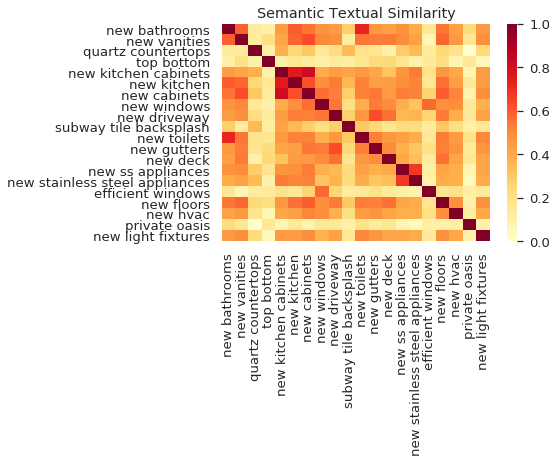

In [18]:
run_and_plot(list(noun_sentence_df_1000['noun_sentence'].values[:20]))

(40, 512)


[array([1.], dtype=float32),
 array([0.62533396], dtype=float32),
 array([0.49155614], dtype=float32),
 array([0.43917787], dtype=float32),
 array([0.45166826], dtype=float32),
 array([0.4889471], dtype=float32),
 array([0.51670927], dtype=float32),
 array([0.55545413], dtype=float32),
 array([0.43771717], dtype=float32),
 array([0.44962797], dtype=float32),
 array([0.31143486], dtype=float32),
 array([0.59457994], dtype=float32),
 array([0.5460185], dtype=float32),
 array([0.28505495], dtype=float32),
 array([0.13501224], dtype=float32),
 array([0.23239036], dtype=float32),
 array([0.33235767], dtype=float32),
 array([0.45153368], dtype=float32),
 array([0.59929276], dtype=float32),
 array([0.5745927], dtype=float32),
 array([0.1901815], dtype=float32),
 array([0.4918634], dtype=float32),
 array([0.1539138], dtype=float32),
 array([0.41599715], dtype=float32),
 array([0.21775827], dtype=float32),
 array([0.54251766], dtype=float32),
 array([0.56556576], dtype=float32),
 array([0.13580

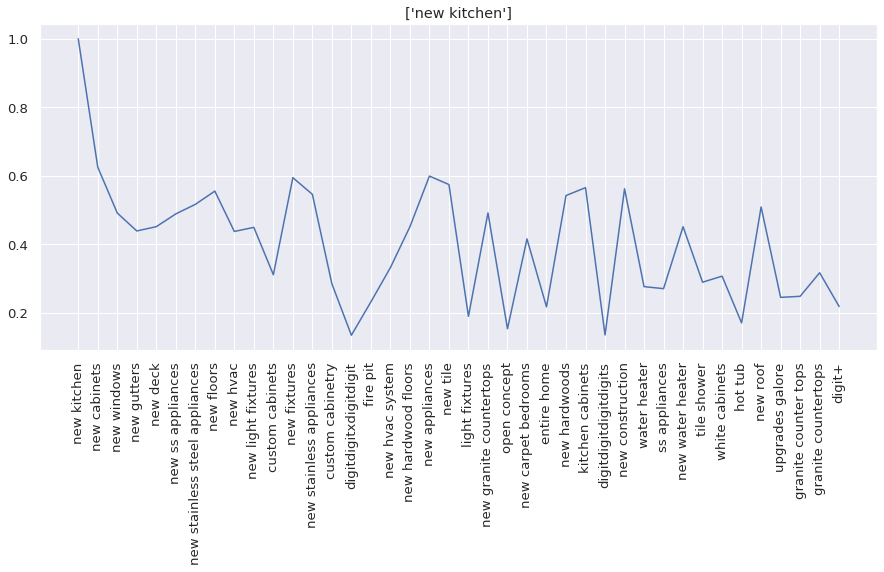

In [19]:

fig = plt.figure(figsize=(15, 6))
plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[0]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

(40, 512)
['new', 'kitchen']


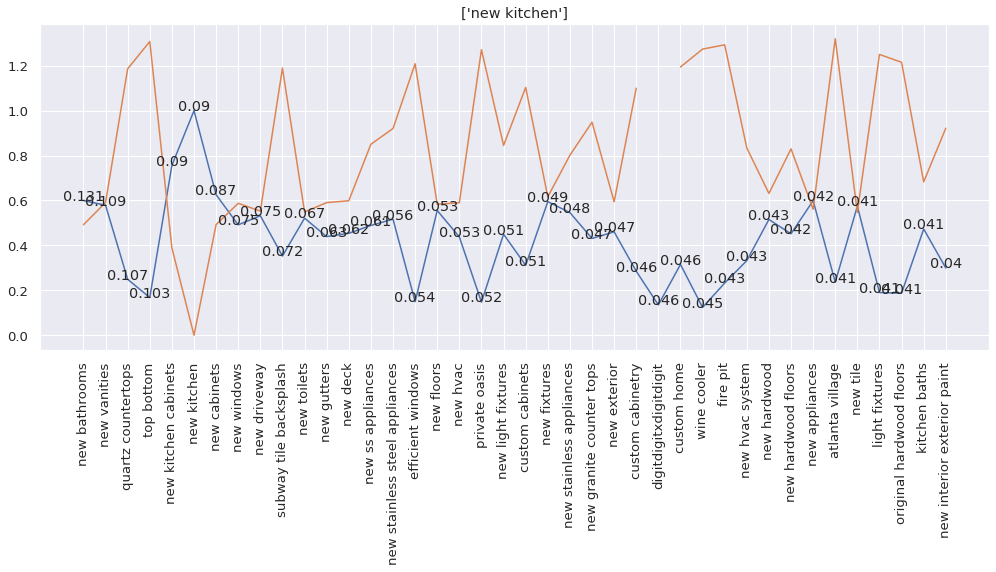

In [23]:
fig = plt.figure(figsize=(17, 6))
corr = plot_similarity_serie_error([noun_sentence_df_1000['noun_sentence'].values[5]],
                                    list(noun_sentence_df_1000['noun_sentence'].values[:40]),
                                    list(noun_sentence_df_1000['AVM_Error_Average'].values[:40]),90)
#print(np.array(corr).shape)
#plt.text(range(len(list(noun_sentence_df_2000['noun_sentence'].values[:40]))), 
#         corr, 
#         str(list(noun_sentence_df_2000['AVM_Error_Average'].values[:40])))

In [24]:
corr[2]

array([0.49199539, 0.59066151, 1.18613105, 1.30790061, 0.38872732,
       0.        , 0.49278836, 0.58746761, 0.55254862, 1.1892248 ,
       0.54879173, 0.59051388, 0.59878038, 0.85032186, 0.92047414,
       1.20889257, 0.58293755, 0.5899696 , 1.27127377, 0.84511183,
       1.10343081, 0.616278  , 0.80143589, 0.94862353, 0.59413358,
       1.10001824,        inf, 1.19414251, 1.27401261, 1.29308992,
       0.83378257, 0.63127563, 0.82979903, 0.56093664, 1.32023018,
       0.54645275, 1.25028119, 1.21512743, 0.68276456, 0.92182679])

(40, 512)


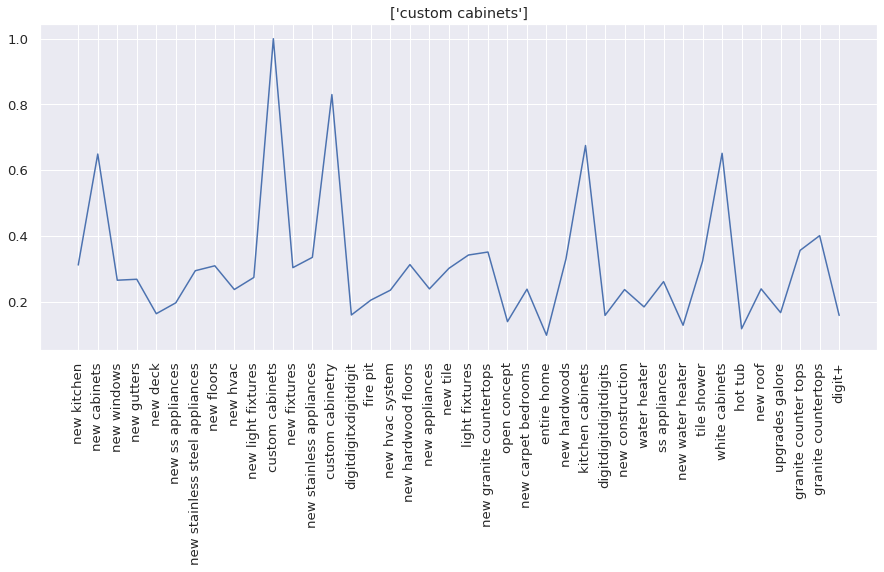

In [25]:
fig = plt.figure(figsize=(15, 6))
corr = plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[10]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

(40, 512)


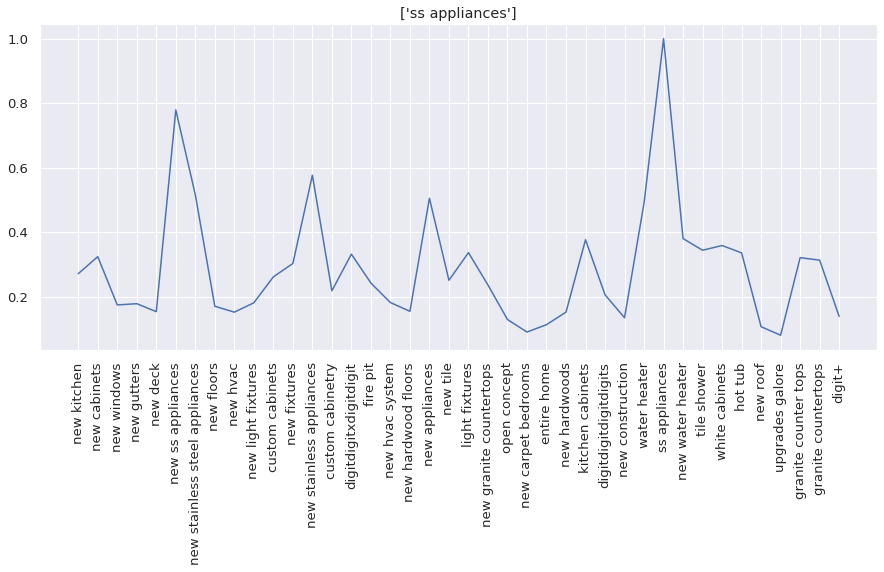

In [26]:
fig = plt.figure(figsize=(15, 6))
corr = plot_similarity_serie([noun_sentence_df_2000['noun_sentence'].values[30]],
      list(noun_sentence_df_2000['noun_sentence'].values[:40]),90)

In [27]:
np.inner(np.array([0,1]),np.array([0,1]))

1

In [28]:
list_of_noun_sentences

NameError: name 'list_of_noun_sentences' is not defined

In [29]:
list_of_embeddings

NameError: name 'list_of_embeddings' is not defined

In [30]:
sentence_possibilities = noun_sentence_df_1000['noun_sentence'].values

In [31]:
sentence_possibilities

array(['new bathrooms', 'new vanities', 'quartz countertops',
       'top bottom', 'new kitchen cabinets', 'new kitchen',
       'new cabinets', 'new windows', 'new driveway',
       'subway tile backsplash', 'new toilets', 'new gutters', 'new deck',
       'new ss appliances', 'new stainless steel appliances',
       'efficient windows', 'new floors', 'new hvac', 'private oasis',
       'new light fixtures', 'custom cabinets', 'new fixtures',
       'new stainless appliances', 'new granite counter tops',
       'new exterior', 'custom cabinetry', 'digitdigitxdigitdigit',
       'custom home', 'wine cooler', 'fire pit', 'new hvac system',
       'new hardwood', 'new hardwood floors', 'new appliances',
       'atlanta village', 'new tile', 'light fixtures',
       'original hardwood floors', 'kitchen baths',
       'new interior exterior paint', 'tile bathrooms',
       'new granite countertops', 'open concept', 'kitchen bathrooms',
       'new carpet bedrooms', 'interior exterior', 'en

In [32]:

keys_list = list(noun_sentence_df['noun_sentence'].values)
values_list = [[] for i in range(len(keys_list))]
noun_sentences_dictionary = dict(zip(keys_list, values_list))

In [33]:
list_of_noun_sentences = []
list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[0])

list_of_embeddings = []
list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[0])

for idd in range(len(noun_sentence_df_1000)):
#for idd in range(50):
    if (idd%30==0): print(idd,len(noun_sentence_df_1000))
    labelrefwords = noun_sentence_df_1000['noun_sentence'].values[idd].split()
    corrs = np.zeros(len(list_of_noun_sentences))
    #distances = np.zeros(len(list_of_noun_sentences))
    #print(corrs)
    for jdd in range(len(list_of_noun_sentences)):
        labelwords = list_of_noun_sentences[jdd].split()
        corrs[jdd] = pearsonr(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[jdd])[0]
        #distances[jdd] = model_gensim.wmdistance(labelrefwords, labelwords)
    #print(corrs)
    #print((corrs<0.79) & (distances>0.5))
    #temp = corrs[((corrs<0.79) & (distances>0.5))]
    temp = corrs[(corrs<0.8)]
    #print(len(temp)==len(list_of_noun_sentences))
                          
    if (len(temp)==len(list_of_noun_sentences)):
        list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[idd])
        list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd])
    else:
        if (len(corrs[(corrs>=0.8) & (corrs!=1)])>0):
            #print(list_of_noun_sentences)
            #print(list((corrs>=0.8) & (corrs!=1)))
            #print(list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)]))
            temp_list = noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]]
            #print(temp_list)
            temp_list.append(noun_sentence_df_1000['noun_sentence'].values[idd])              
            noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]] = temp_list         

0 639
30 639
60 639
90 639
120 639
150 639
180 639
210 639
240 639
270 639
300 639
330 639
360 639
390 639
420 639
450 639
480 639
510 639
540 639
570 639
600 639
630 639


In [34]:
    

for idd in range(len(noun_sentence_df_50)):
#for idd in range(2):
    if (idd%10==0): print(idd,len(noun_sentence_df_50))
        
    count = 0
    corr = 0
    
    noun_sentence_df_50['noun_sentence_embeddings'].values.shape
    
    while ((corr < 0.8) & (corr!=1)):
        #print(noun_sentence_df_50['noun_sentence'].values[idd], ' -- ', list_of_noun_sentences[count])
        corr = pearsonr(noun_sentence_df_50['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[count])[0]
        
        count += 1
        
        #print(corr,count,len(list_of_embeddings))
        
        if (count==len(list_of_embeddings)):
            list_of_noun_sentences.append(noun_sentence_df_50['noun_sentence'].values[idd])
            list_of_embeddings.append(noun_sentence_df_50['noun_sentence_embeddings'].values[idd])
            print(idd,'new', noun_sentence_df_50['noun_sentence'].values[idd])
            break
        
    else:
        print(corr,count,len(list_of_embeddings))
        temp_list = noun_sentences_dictionary[list_of_noun_sentences[count-1]]
        temp_list.append(noun_sentence_df_50['noun_sentence'].values[idd])
        noun_sentences_dictionary[list_of_noun_sentences[count-1]] = temp_list 
    


0 10639
0 new luxurious baths
1 new new shaker cabinets
2 new chefs kitchen w/ ss appliances
3 new tack room
4 new new drywall
0.8316173077983571 50 488
6 new perkerson park
7 new new hall bath
8 new stall barn
0.8572136716476111 488 491
10 10639
0.841702098475388 485 491
11 new amazing renovation
12 new monday night garage
13 new minutes beltline
14 new digit-stall
0.82221376658618 492 495
16 new contemporary finishes
0.8708093919524498 485 496
18 new modern farmhouse
0.8201431174092944 95 497
20 10639
20 new new master suite
0.9999999999999998 430 498
0.874505114472234 492 498
23 new modern renovation
0.9352998759389431 492 499
25 new custom barn doors
1.0 3 500
0.8119118746066543 50 500
28 new new systems
29 new mercedes benz stadium
30 10639
30 new new white kitchen
0.8113218997981887 1 503
32 new omission and/or
33 new modern design
34 new amp service
35 new high end s.s. appliances *
36 new custom vent hood
37 new top bottom renovation
38 new doors drawers
39 new designer fixture

323 new new vanity
0.8317218581808927 383 709
325 new plush carpet
326 new anderson windows
0.8593855983873655 52 711
0.9273732400727015 492 711
329 new piece paradise
330 10639
0.9267607122717745 5 712
331 new patio pool
0.8827757613156628 702 713
333 new extra large island
0.8650666167958513 608 714
0.896320921927813 30 714
0.8705299204259738 1 714
337 new decorative fireplace
0.8150291905622643 185 715
339 new modern cabinets
340 10639
0.8549073147247519 592 716
341 new updates list
342 new new cement
343 new one-of-a-kind home
344 new new custom cabinetry
345 new pool spa
0.8459776887776078 36 721
0.8133556039137553 364 721
0.8004479270915075 22 721
349 new ready february
350 10639
350 new main double vanities
0.8542686925215064 33 723
0.8977145336273282 184 723
353 new electric panel
0.8856978422182327 517 724
355 new porch w/ fireplace
356 new need storage
357 new future beltline
358 new arch roof
359 new new master bathroom
360 10639
0.8098260454471162 72 729
361 new beautiful t

649 new floors bathrooms
650 10639
650 new digitdigitxdigitdigit digit
651 new retail district
652 new wooden beams
653 new new patio
654 new large deck outdoor
655 new ice maker
656 new high end
657 new incredible curb appeal
658 new digitdigit-foot
659 new new pool liner
660 10639
660 new zoysia grass
661 new vegetable garden
0.8143105644729729 42 946
0.8219385090331752 208 946
664 new beautiful bath
665 new private virtual tour
666 new spacious open concept
667 new granite stainless steel appliances
668 new bamboo hardwoods
669 new concrete floor
670 10639
0.8749469340557954 678 952
0.8459051804576112 715 952
672 new interior designer
673 new fabulous owners suite
674 new trash compactor
0.8330151428371859 645 955
676 new professional appliances
677 new full apartment
678 new claw foot tub
679 new state art kitchen
680 10639
680 new beautiful living room
0.8102377295758809 80 960
682 new top line appliances
683 new chefs dream
684 new stone shower
685 new gorgeous master bath
686 ne

962 new dead gorgeous
963 new complete wet
964 new tv area
0.8934514844775873 27 1139
0.875927130521131 201 1139
967 new shower bench
0.8245506216528053 134 1140
969 new fault seller
970 10639
970 new digit+acres
971 new new lvt
0.8377712698242388 62 1143
973 new new faucets
974 new beautiful country setting
975 new multiple vehicles
976 new attic insulation
977 new family members
978 new inman park
0.846710348540799 14 1149
980 10639
980 new stone wall
981 new leaf guard gutters
0.8406151375421853 431 1151
0.8176598585037363 40 1151
984 new spacious hall bath
1.0 385 1152
986 new classic style
987 new ready new homeowner
988 new tile hardwoods
0.8228309233752851 688 1155
990 10639
990 new perfect reading
991 new wood stove
0.8119635042151157 156 1157
993 new new bamboo floors
994 new full lawn mtnc incld focus life
995 new space w/
0.8256141218175205 952 1160
997 new new septic
998 new frank lloyd wright
0.8317119599307363 22 1162
1000 10639
1000 new new pump
1001 new double shower
10

1.0 1241 1345
1275 new door hardware
0.8224074956095602 968 1346
1277 new backyard oasis
0.8314478783450518 22 1347
1279 new public records
1280 10639
1280 new new sod
0.8068374345904533 1241 1349
1282 new gourmet kitchen w/stainless steel appliances
1283 new master suite w/ walk-in closet
1284 new minutes decatur
0.8447211337728694 69 1352
1286 new family space
1287 new entry doors
1.0 78 1354
1289 new hardie plank
1290 10639
1290 new blocks park
1291 new designer upgrades
0.8075595086691905 166 1357
1293 new happy home
0.8007398483986186 344 1358
1295 new perfect combination
1296 new travertine shower
0.8853905196038514 708 1360
1298 new large mudroom
0.8666728775580107 23 1361
1300 10639
1300 new master retreat envy
0.8828175090688184 1239 1362
0.8496278293311208 57 1362
0.9232752814742327 46 1362
1304 new perfect extra storage
1305 new time outdoors
1306 new youll fall
1307 new time summer
0.8005235369072914 91 1366
1309 new dishwasher microwave
1310 10639
1310 new private sanctuar

1581 new main floor bedrooms
1582 new concept floor plan
0.8161724481844603 899 1538
0.8066285125543609 82 1538
1585 new fixtures *
1586 new stainless steel fridge
1587 new hartsfield airport
1.0 115 1541
0.8255561775440776 87 1541
1590 10639
0.8833384091795431 112 1541
1591 new kitchen upgrades
0.8785126352245309 1173 1542
0.8509739192727794 22 1542
0.8647352505744529 292 1542
1595 new plan w/
1596 new remote control
0.8509715828325441 165 1544
1598 new extra garage
0.8247263822332364 190 1545
1600 10639
1600 new excellent area
1601 new pristine hardwoods
1602 new owners suite w/
0.8640396577241658 592 1548
1604 new area owners
1605 new beauty home
0.8751736069951475 276 1550
0.8659341707045425 1185 1550
0.9999999999999999 824 1550
1609 new digitm
1610 10639
1610 new buyers fall
1611 new pine floors
0.8894163997138247 950 1553
0.8038865298810903 131 1553
1614 new garden beds
1615 new interior boasts
1.0 476 1555
1617 new outdoor fp
1618 new hot water tank
1619 new s dream
1620 10639
0

1890 new area pets
1891 new home wow
0.816270589702704 641 1734
0.8704280603769166 703 1734
1894 new moment step
0.8116121499939517 1106 1735
0.8209512487176447 169 1735
1897 new new hdigito heater
0.8636470115887662 178 1736
0.876592407858062 17 1736
1900 10639
0.8138937607077832 1557 1736
0.882856096261275 1084 1736
1902 new perfect boat
1903 new multiple living spaces
1904 new unique features
0.8890556319902487 166 1739
1906 new porch w/fp
1907 new incredible location minutes i-digitdigit
1908 new new upgrades
1909 new built-in pantry
1910 10639
1910 new local restaurants
0.848989406012921 117 1744
1912 new private outdoor
0.9188815019216937 71 1745
0.842956227703205 1185 1745
0.9258357554061107 1540 1745
0.8889849746413987 907 1745
0.841161057985262 156 1745
0.939217295540588 206 1745
1919 new acre retreat
1920 10639
1920 new open concept designs spaces
1921 new lovely foyer
0.9019618409192561 1345 1748
1923 new community dock
0.8413649910470462 50 1749
0.824526670818075 73 1749
0.

0.8854003175757603 1376 1909
0.8141138888403838 27 1909
2193 new true ranch
2194 new wine closet
2195 new traditional brick ranch
2196 new entertainment deck
0.822752986349863 398 1913
0.8460794640359579 809 1913
0.8188795344069928 216 1913
2200 10639
2200 new charming cottage
0.8942267371752071 1854 1914
0.8295595405871214 1406 1914
0.8742741861029455 103 1914
0.9606540856849377 1602 1914
2205 new virginia highlands
2206 new shower walk-in closet
2207 new huge owners
2208 new water filtration system
2209 new open porch
2210 10639
2210 new view lake
2211 new expansive living room
0.8429367355396253 80 1921
2213 new natural light floods
2214 new mature plantings
0.8630795991490856 217 1923
0.831938188582031 47 1923
2217 new peace mind
2218 new digitbdr
2219 new beautiful floor
2220 10639
2220 new perfect den
2221 new dbl pane windows
0.8163935353413754 124 1928
2223 new swim/tennis club
2224 new popular open floor plan
2225 new amazing privacy
2226 new secondary bedrooms laundry room
22

2497 new automatic garage door opener
0.8944617542711347 1483 2099
2499 new beautiful wood cabinets
2500 10639
2500 new bedrooms w/
2501 new pleasure show
0.8973829148328623 196 2102
0.8075015605474771 1317 2102
0.8109929288156483 732 2102
0.8271731758291773 126 2102
2506 new complete w/
2507 new electrical outlets
2508 new special home
0.813793986141539 51 2105
2510 10639
0.8209995675489103 1084 2105
2511 new dual vanity bath
2512 new photos home plan
2513 new bsmt w/
0.8444069381906194 1124 2108
0.8136140127481961 80 2108
2516 new floor bedrooms
0.8841759191140124 205 2109
0.8365366280580953 282 2109
2519 new beautiful historic home
2520 10639
0.8482986195875087 770 2110
0.8194427240570568 251 2110
2522 new professional photos
0.8759894817569707 571 2111
0.8048990124489703 1422 2111
2525 new theatre room
2526 new cost use
0.832103330920289 1248 2113
2528 new spacious additional bedrooms
0.8335752968361325 648 2114
2530 10639
2530 new digit-acre
2531 new new air
2532 new beautiful vie

2800 new brookfield country club
2801 new sure check
1.0 1435 2271
2803 new quality abounds
2804 new beautiful new hardwoods
0.8577241750051521 1472 2273
2806 new separate cook top
2807 new tons character
2808 new new int
0.8663774958911952 395 2276
2810 10639
2810 new blinds windows
2811 new private porch
0.8150910210175855 1241 2278
0.8356214384897829 311 2278
2814 new frieze carpet
2815 new open concept kitchen
0.9150259176817785 1595 2280
0.8351406796093706 1434 2280
2818 new main campus
0.8530048416321978 282 2281
2820 10639
2820 new movable island
2821 new charming fireplace
0.8093852200291234 350 2283
2823 new easy commute airport
0.8086865999992319 2046 2284
2825 new owner retreat
2826 new hdwds thruout
2827 new remarkable swim community
0.8313341585742646 1710 2287
2829 new tanger outlets
2830 10639
2830 new massive walk closet
0.8299512366603699 991 2289
2832 new city water
2833 new dunwoody home
0.8212200512598617 124 2291
0.8442548580934433 90 2291
2836 new oversize master 

3104 new storage barn
0.8722279022845976 339 2446
3106 new main level hardwood
3107 new easy access i-digitdigit hwy
0.9317797408515486 985 2448
0.8055248029863666 1890 2448
3110 10639
0.813445547296662 165 2448
3111 new upstairs family room
3112 new amazing closet
3113 new private door
0.8184139242805542 598 2451
3115 new showcase home
0.8360620483315915 1623 2452
3117 new elegant master suite
3118 new prime roswell location
0.8158737828483322 71 2454
3120 10639
0.8397009479586861 983 2454
0.8326555798834232 333 2454
3122 new beautiful new home
3123 new digit.digitdigitac
0.8407474315066326 1078 2456
3125 new digit-level
0.8081241811295425 139 2457
3127 new tree house
3128 new ceilings tons
3129 new remarkable ranch
3130 10639
3130 new upper deck
3131 new ample space
3132 new quiet living
3133 new flat front
0.8280942485461775 152 2464
3135 new backyard w/ patio
3136 new work area
0.8211488195612486 597 2466
3138 new perfect teen/in-law suite
3139 new sunroom w/
3140 10639
0.924396655

0.9352369443665518 2195 2615
3407 new homes price
3408 new digit-years
3409 new inviting entry foyer
3410 10639
3410 new master suite w/fireplace
0.8265509191673854 2189 2619
3412 new quick access hwy
0.9111075700826727 46 2620
0.8230349610083824 2344 2620
3415 new hillgrove hs district
3416 new main +
3417 new additional living room
3418 new family rm w/stone fireplace
3419 new cookie cutter
3420 10639
3420 new family dinners
3421 new inviting sunroom
0.9604118089073034 2011 2627
3423 new great spot
0.8120765355413879 1254 2628
3425 new whole house humidifier
0.8020872373531568 2467 2629
0.8864349230481501 313 2629
0.8242153355163853 1001 2629
0.8780435690318433 416 2629
3430 10639
3430 new walk-out backyard
0.8671427896596303 675 2630
3432 new smart home technology
0.9037420839661959 1513 2631
3434 new parkview high school district
0.8105375946540645 101 2632
3436 new trane hvac
3437 new warm colors
0.823527813615587 148 2634
3439 new full bath laundry
3440 10639
0.8133087217772329 1

3705 new additional bed
0.912017847091692 66 2774
3707 new teen/in-law suite
0.8127624526913364 76 2775
0.9103410809961693 1329 2775
3710 10639
0.8581153234435094 1403 2775
0.8917938909862294 85 2775
0.8222128610327475 370 2775
3713 new ceilings lots
3714 new market fault seller
0.869618245353274 1724 2777
3716 new story craftsman
3717 new minutes suntrust park
3718 new double bowl vanity
0.9310777158455937 756 2780
3720 10639
0.8428912651966856 247 2780
0.9053611406041747 1886 2780
3722 new porches front
1.0 2658 2781
3724 new deep garage
3725 new home market
0.8605122460615906 134 2783
3727 new large lr
3728 new craft room
3729 new ball fields
3730 10639
0.8547249466880836 93 2786
0.8018317906829044 32 2786
3732 new theres place
3733 new car port
3734 new perfect playroom
3735 new beautiful laminate
3736 new ... dont
0.8322354892897221 204 2791
3738 new backyard kids
0.8054415302659055 217 2792
3740 10639
3740 new in-law teen suite
0.8238186668884377 1673 2793
0.8151117691849374 261 

0.9167386989974664 2181 2933
0.8297275178372966 2826 2933
4007 new full acre
0.8829302220125403 163 2934
0.8267819483039781 1107 2934
4010 10639
4010 new small office
4011 new main level french doors
0.9143568870346102 46 2936
0.8398339188083422 267 2936
0.8263472185419549 2340 2936
4015 new huge wic
4016 new dual hvac
4017 new perfect cooking
4018 new real beauty
4019 new shop area
4020 10639
0.9328569669489597 193 2941
4021 new fireside den
4022 new southern charmer
4023 new perfect level
0.831171194404732 156 2944
4025 new spacious master bedroom walk closet
0.9048242563578752 1522 2945
4027 new new roof hvac
4028 new digityrs
0.9102984439471405 396 2947
4030 10639
0.8349993930918975 2750 2947
0.8661345742910834 465 2947
4032 new worth upgrades
4033 new study room
0.8405689223907967 204 2949
0.9018410439012755 131 2949
0.8991220227596565 1127 2949
4037 new additional kitchen
4038 new separate water closet
4039 new acre park
4040 10639
4040 new area family room
0.8139206205460705 243

4311 new hobby room
4312 new swim/tennis optional
4313 new seller contribute
0.8858642792387108 467 3112
0.8373777184702007 409 3112
4316 new beautiful landscape
4317 new hartsfield jackson airport
4318 new tot lot
4319 new digitbedroom digit.digit
4320 10639
0.9999999999999998 227 3116
4321 new mins i-digitdigit
0.8167640894625565 147 3117
0.8498948915296114 2890 3117
4324 new big ticket items
4325 new ample room
4326 new town brookhaven
0.9196516436765185 2533 3120
4328 new home shows
0.8966483450252951 141 3121
4330 10639
0.9053659498243645 34 3121
4331 new br bath
4332 new open floorpan
4333 new step-less entry
0.8826565804228237 169 3124
4335 new access patio
0.8193054876536039 139 3125
4337 new classic home
0.8878546310376 2982 3126
4339 new bonus/digitth bedroom
4340 10639
4340 new great restaurants
4341 new front windows
0.8379440817262244 1662 3129
4343 new bedroom garage
4344 new easy one-level
4345 new mstr ste
0.9024777059575689 131 3132
4347 new pool rm
4348 new kennesaw s

4612 new home pristine
4613 new kitchen access
4614 new home inspection
4615 new great use space
0.8900131160308871 2768 3273
4617 new new cooktop
4618 new multiple fireplaces
4619 new large master ste
4620 10639
0.8007584908294142 2513 3276
0.8783177922134479 1395 3276
0.9505909056029019 141 3276
0.8613396149178003 34 3276
0.8059978887182472 47 3276
4625 new available buyers
1.0 1475 3277
4627 new open flow
0.8291865944587974 120 3278
4629 new spacious living room fireplace
4630 10639
4630 new area office
0.889320540315995 376 3280
4632 new relax deck
0.8509858838235635 388 3281
0.9067064982849559 1088 3281
0.8373666077702957 208 3281
0.8015143903828946 208 3281
4637 new house boasts
4638 new great room fp
4639 new cabinet hardware
4640 10639
0.8188611499935204 184 3284
0.8725041190090719 2370 3284
4642 new sun room kitchen
0.9012998120035219 323 3285
0.8637522002700072 2893 3285
4645 new private view
4646 new inviting living room
4647 new home buyers warranty
4648 new possible bedroo

4910 new quiet s/d
4911 new new carpet stairs
0.83431163815673 231 3428
4913 new car side entry
4914 new master +
4915 new fireside family rm
0.8861090316795299 2409 3431
0.8731848262717707 1226 3431
1.0 66 3431
0.8022054881677578 99 3431
4920 10639
1.0 378 3431
1.0 1617 3431
0.8357922692037116 283 3431
0.804031953676895 924 3431
4924 new spacious media room
4925 new medical center
0.8393675966210523 148 3433
4927 new eat-in kitchen view family room
0.8815226922671173 206 3434
4929 new miles ga
4930 10639
4930 new wow ...
4931 new bd/digit.digit ba home
4932 new extra hardwoods
0.8197334492829451 277 3438
4934 new double crown
0.8133459527485021 410 3439
4936 new schedule appt
4937 new water closet
4938 new upstairs storage
0.8178733867994825 80 3442
4940 10639
0.8081694108146416 1438 3442
4941 new full bed/bath
4942 new tons extras
0.8149975123987963 2304 3444
0.80588708118468 273 3444
0.9096516768904053 1147 3444
0.8235717950934216 141 3444
4947 new new place
0.8910606228570831 1630 

5210 new warm winter
0.8533765385367437 231 3589
1.0 2286 3589
0.8244978259150593 398 3589
0.9051358107017684 3183 3589
0.8436700568870882 2562 3589
0.8980740243344725 2164 3589
5217 new huge mstr suite
0.8909001489030172 1835 3590
5219 new large office
5220 10639
0.8032888232836779 229 3591
0.8292829951254173 3010 3591
5222 new luxurious owners retreat
0.831714876762041 307 3592
0.852386862569189 2977 3592
5225 new easy commute atlanta
5226 new rooms *
5227 new full bath office
5228 new home depot
1.0 1560 3596
5230 10639
0.8338336620756311 72 3596
0.8318012576883602 2565 3596
5232 new dbl vanities
0.8322119958301122 313 3597
5234 new sand volleyball
5235 new computer room
5236 new hardwood floors lr
5237 new lg walk-in closet
0.8238802149002338 2573 3601
5239 new open kitchen family room
5240 10639
5240 new digit-minute
0.8227567835653447 1520 3603
0.8269123022035336 143 3603
5243 new main w/digit
5244 new abundance cabinet space
5245 new granite countertops hardwood floors
0.8032717

0.8714062967065225 3454 3740
0.8307807697367244 1662 3740
5506 new full length
5507 new rec space
0.8655394432629119 2092 3742
0.8852325203450427 2903 3742
5510 10639
0.8036437290817833 1981 3742
0.8948611217379192 331 3742
5512 new spindles staircase
5513 new elegant crown
0.8264833083609118 320 3744
0.889697999207497 298 3744
0.8611759427535798 1516 3744
0.8387565796086388 1721 3744
0.9077818086931628 1931 3744
0.847437280348542 2448 3744
5520 10639
0.8146135507372041 85 3744
5521 new room high
1.0 2321 3745
5523 new large walk closets
0.8043378115097346 1898 3746
5525 new flat driveway
5526 new generous size
5527 new playground lake
0.8137230159412011 1045 3749
5529 new free exterior
5530 10639
0.8628502525425527 176 3750
0.8799394467325753 3174 3750
5532 new awesome backyard
0.8332315928266005 164 3751
5534 new entertainment room
5535 new breakfast area view
5536 new great view backyard
0.8064592281899583 942 3754
0.8177895633792798 1484 3754
5539 new huge sun room
5540 10639
5540 

5801 new marble bathrooms
0.8024551613684203 1418 3885
0.8563541115321947 2081 3885
0.8399127869779334 1893 3885
5805 new double door entry
5806 new large double
5807 new parks schools
0.8102258118803968 2061 3888
0.8627424380544203 1109 3888
5810 10639
5810 new generous master
5811 new desirable johns creek
5812 new upstairs home
0.9300653889734654 465 3891
0.8824967543912969 1861 3891
5815 new laundry areas
0.8128993841032099 257 3892
5817 new end street
5818 new bonus space
0.9004956775052644 3286 3894
5820 10639
5820 new sep cooktop
0.8082553968017077 1207 3895
5822 new cabinets breakfast area
0.8407078476307508 2009 3896
5824 new convenient interstates
0.8156645238599718 182 3897
0.815377620611371 128 3897
5827 new chair railing
5828 new huge walk pantry
0.8215308136558896 317 3899
5830 10639
0.8712560928750324 1166 3899
0.8002006886893515 169 3899
0.8705411656760383 3549 3899
0.8575957981793214 1127 3899
0.8339682816675104 3292 3899
5835 new story foyer hardwood
0.825845299545152

6096 new open breakfast area kitchen
6097 new beautiful windows
0.8019410793780808 143 4013
6099 new earthcraft home
6100 10639
6100 new private level
6101 new jackson school district
0.8407008304739703 2767 4016
6103 new story foyer welcomes home
6104 new kitchen heart home
0.8086703110274103 258 4018
1.0 79 4018
6107 new decorative columns
6108 new sunroom deck
0.9407191022874608 1511 4020
6110 10639
0.8317035237161693 845 4020
6111 new elementary district
0.8897250111840299 226 4021
0.9212524692809081 1780 4021
6114 new peaceful neighborhood
0.8246240815699488 316 4022
0.8062268797172774 137 4022
0.856647473243974 2462 4022
0.877337668220968 174 4022
6119 new spacious fireside
6120 10639
0.8081965153982968 1750 4023
0.8806698259530326 3065 4023
0.8365240654270281 1635 4023
6123 new large light
0.820460564715026 3004 4024
0.9408976765467145 2404 4024
6126 new great room gas log fireplace
0.8049976180947942 2476 4025
0.8499003380458492 2409 4025
0.8255654670977217 1570 4025
6130 10639

6389 new acre lake
6390 10639
0.8122918515109077 276 4140
6391 new spacious master retreat
6392 new milton school district
0.8333623385480458 3986 4142
6394 new new sod front yard
6395 new nice features
0.8120923381077164 193 4144
6397 new national recreation area
6398 new private en-suite bath
6399 new double cul-de-sac
6400 10639
6400 new great play
0.8082963119097133 1093 4148
6402 new large rear yard
0.8236526475419399 100 4149
6404 new convenient cdc
6405 new low maint
6406 new low maintenance vinyl exterior
0.8639255254815892 410 4152
0.8044053144421287 3344 4152
0.8125814598531427 1557 4152
6410 10639
6410 new his/her vanities
6411 new pool tennis court
0.8346120583524801 80 4154
0.8030673392561012 3677 4154
6414 new ample cabinetry
6415 new open kitchen granite counters
0.8228740666036628 135 4156
6417 new deck access
6418 new deck fireplace
0.9328480764153391 2242 4158
6420 10639
6420 new small stream
0.8792379370154655 1202 4159
0.8260508552756387 165 4159
1.0 179 4159
6424 n

6681 new perfect lot
1.0 79 4276
0.9400231930968987 140 4276
0.8285638219888489 3937 4276
6685 new large kitchen w/
0.8682656403172292 2193 4277
6687 new large great rm w/ fireplace
6688 new bath family room
0.9322369064063168 107 4279
6690 10639
0.8149726366756476 311 4279
6691 new cherry cabs
6692 new spare bedrooms
6693 new secondary bedrooms walk-in closets
6694 new flexible space
0.8213254015084852 1624 4283
1.0 4065 4283
6697 new plenty privacy
6698 new short drive
6699 new archer high school district
6700 10639
0.8834752954850746 340 4286
0.8950173637846147 105 4286
0.9362924764023113 3809 4286
6703 new beautiful trey
0.8139910188381103 252 4287
0.8138815941364803 52 4287
0.8094938059848874 264 4287
0.9260571531937374 389 4287
0.845438982158857 2637 4287
0.8504121822147693 3213 4287
6710 10639
0.8292096572270637 58 4287
6711 new underground utilities
6712 new brick front beauty
0.8011630379504189 14 4289
0.8366791325576969 1374 4289
6715 new gourmet kit
0.8717159856415316 221 42

6974 new ola schools
0.8160718872537394 3381 4400
6976 new alley access
0.9260294854010164 4196 4401
0.8482492171628033 68 4401
6979 new great smyrna location
6980 10639
6980 new lg family room
6981 new contemporary ranch
0.8630371224090422 2700 4404
6983 new level family room
0.9058336873863954 253 4405
6985 new lots sunlight
6986 new room w/fp
0.8536662063333607 2522 4407
0.897433289234926 3241 4407
0.9363156738956822 2265 4407
6990 10639
0.8669116479676188 229 4407
6991 new opportunity purchase home
0.8191227156408156 348 4408
0.8154910765805473 1154 4408
0.8233457758395626 290 4408
0.9167702566675522 152 4408
6996 new affordable luxury
0.8192044003265133 2836 4409
0.8029386751464327 3918 4409
6999 new in-law ste
7000 10639
7000 new spacious secondary bedrooms w/
0.8380620093345839 167 4411
0.8025317504231306 4089 4411
7003 new swim/tennis nhood
0.8878979698489156 2344 4412
0.8442251018244239 3918 4412
0.8742133698582836 285 4412
0.882075434146451 1958 4412
7008 new library office
0

7264 new additional sunroom
0.8113000045576078 3979 4527
0.8381714710363034 413 4527
0.8885811838674819 362 4527
0.8160282237574095 140 4527
0.8566121676939953 1690 4527
7270 10639
0.8129022555078814 2750 4527
7271 new hardcoat stucco
0.8332708984875961 1624 4528
7273 new bedroom plan master
7274 new large teen suite
7275 new floor hardwoods
0.8413260856551544 2958 4531
7277 new beautiful columns
7278 new main additional bedroom
0.8069236305394768 1702 4533
7280 10639
0.8067720246420809 128 4533
0.9085349901772772 265 4533
0.8475441837309499 2001 4533
7283 new great school
7284 new full appliance package
7285 new hardwood trees
0.8596983197868544 2211 4536
7287 new large playground
7288 new computer nook
0.8543776336118185 387 4538
7290 10639
0.8569016286091933 319 4538
0.8025812608494516 267 4538
0.8106138520462529 5 4538
0.8102941295472416 1545 4538
0.8520450420780832 342 4538
0.91348874210881 1763 4538
0.8388818308239072 1214 4538
7297 new hard days work
7298 new trees privacy
7299 

7557 new expansive master
7558 new neighborhood clubhouse
0.8628136724929856 2991 4651
7560 10639
0.8076540901735124 315 4651
7561 new perfect price
7562 new town center mall
0.8191919598513534 2203 4653
0.8186616149376925 3657 4653
0.9101330830411622 344 4653
0.8654185733888209 398 4653
0.8757983720258377 1866 4653
0.8305230083206334 3394 4653
7569 new ceilings fireplace
7570 10639
7570 new sunroom addition
0.8161477715537439 4477 4655
0.8337585016728193 388 4655
0.9493434656401732 2496 4655
0.8433641540833914 389 4655
7575 new charming traditional home
7576 new bedrooms hardwood floors
0.8405306690322756 4654 4657
7578 new ideal guests
0.8336542326802963 467 4658
7580 10639
0.8052483417478049 39 4658
7581 new sunny eat-in kitchen
7582 new desirable schools
0.887711551391408 315 4660
7584 new common area
7585 new airy floor plan
7586 new roof approx
0.8596983197868544 2211 4663
7588 new lake dow
0.8262804947358824 3703 4664
7590 10639
0.8261981269951375 1202 4664
0.8650242641443693 58

7854 new end cul-de-sac
7855 new full price
0.9085349901772772 265 4788
7857 new br w/
0.8208122588455025 4648 4789
0.8277290331371828 1438 4789
7860 10639
7860 new easy access ga
0.8035375521712458 3640 4790
0.9089432889818505 3143 4790
0.8641107650352471 315 4790
0.8762043496660574 561 4790
0.8332566691741279 205 4790
0.9457407721513109 667 4790
0.8525179671187297 2216 4790
0.8125808628965274 298 4790
7869 new active lifestyle
7870 10639
7870 new unfin bsmt
7871 new city park
0.8374613330655429 1323 4793
0.8884771263314009 3799 4793
7874 new complete island
0.8325459563755586 2143 4794
0.8357611559620336 1222 4794
0.8213509081138826 2766 4794
0.9060949106546503 400 4794
7879 new perfect view
7880 10639
7880 new hwd flrs
0.9532646741477884 421 4796
0.8348426539313936 233 4796
7883 new rm seats
0.8080445801253298 2495 4797
0.8041655421192999 63 4797
7886 new bedrooms master
0.8048402684683225 283 4798
7888 new house money
0.8698886640509428 2190 4799
7890 10639
0.8045914074489819 4221 

8147 new main w/bath
0.8337779690731937 390 4892
0.9102580212534761 4217 4892
8150 10639
0.8063162491478311 3857 4892
0.8868883304069439 597 4892
0.83543323749446 2520 4892
0.8212198484182336 230 4892
0.8072294611791564 1468 4892
8155 new active adult community
8156 new sidewalks street lights
8157 new level brick home
0.8078174107084966 4534 4895
8159 new private toilet area
8160 10639
8160 new w/walk-in closets
8161 new hot area
0.9046892937346693 193 4898
0.8510668542713385 350 4898
0.8075242963625363 272 4898
1.0 2667 4898
0.810518240229255 2366 4898
8167 new friendly cul-de-sac
0.8195712340042259 4361 4899
0.8385728880363109 300 4899
8170 10639
0.8457855690542686 439 4899
0.8571880946848022 2465 4899
0.8179638754061023 4620 4899
0.9006330076491711 2945 4899
8174 new story brick home
0.9584634767143063 1674 4900
8176 new cute cozy
0.8010941521605298 1610 4901
0.8546928271917437 3601 4901
0.878844590343133 479 4901
8180 10639
0.8592077211890072 61 4901
8181 new cabinets island
0.806

8437 new side athens
8438 new quiet enclave
0.9090706629921481 3492 5003
8440 10639
0.859972084472784 4248 5003
0.8012105197556851 4612 5003
8442 new heart sandy springs
1.0 2115 5004
0.8278947267568398 201 5004
8445 new gorgeous brick front
0.9029235340778655 409 5005
0.8283130137631317 463 5005
0.9110876902928654 3986 5005
0.8819186725607707 458 5005
8450 10639
0.8439457789786284 3511 5005
8451 new .digit acres
8452 new lg kit
0.8380652614828215 2304 5007
8454 new fulton schools
0.8756082079382579 1819 5008
0.8003980404610909 4965 5008
0.8830104526057806 416 5008
8458 new rm kitchen
8459 new book tour
8460 10639
8460 new lr w/fp
0.8018711557443821 990 5011
0.8871918922345401 299 5011
0.840383061257046 1916 5011
0.813699010502858 3289 5011
8465 new darling home
8466 new real estate
0.8163747248640975 359 5013
0.8394210996721199 308 5013
8469 new huge ranch
8470 10639
0.8906004061334425 4036 5014
0.8784785275416651 109 5014
0.8212314484807393 126 5014
0.8454883439670345 200 5014
8474 n

0.9080207953967132 3122 5122
8735 new swim team
8736 new lease purchase
0.8110403716045474 1754 5124
8738 new country kitchen
8739 new usable space
8740 10639
8740 new digit-stry
0.8171756778071217 160 5127
0.9354322640314565 2624 5127
8743 new areas kitchen
0.837934735297139 968 5128
8745 new large master bedroom tray
0.8213291503235828 375 5129
0.8318437431247651 4338 5129
0.9364227669463902 4225 5129
8749 new time homebuyers
8750 10639
0.8916177936305172 2430 5130
0.8867868315852052 2304 5130
8752 new hello gorgeous
8753 new desirable area
8754 new large basement
8755 new ready september
8756 new homes community
0.836450326339111 2782 5135
0.8451311688511854 197 5135
8759 new real estate license
8760 10639
8760 new income restrictions
0.8173931261569376 80 5137
0.8191143710117228 4932 5137
0.8148148715596653 191 5137
0.8186064773898495 318 5137
0.811774605618331 308 5137
0.8857340049379399 3229 5137
0.8333703246479282 272 5137
8768 new black appliance package
0.8276119410364747 423 

9025 new diamond series
0.8159147224079166 158 5230
9027 new lassiter high school
9028 new main entrance
9029 new central hvac
9030 10639
0.8117915130608448 2430 5233
0.8417712946126716 3672 5233
0.815729116188957 421 5233
0.8665741299498476 267 5233
0.810140724506133 3279 5233
9035 new room expansion
0.8679004022037469 4377 5234
0.915199917356394 454 5234
0.8857331216833979 265 5234
9039 new heart johns creek
9040 10639
9040 new full bath loft
0.803275613688678 4257 5236
9042 new bath brick front home
0.9132145454847118 4112 5237
9044 new generous rooms
0.8523581819213663 165 5238
9046 new finish basement
0.8806683940248725 242 5239
9048 new level rec room
9049 new dryer refrigerator
9050 10639
0.8000783589029166 4811 5241
0.8101442239799778 5149 5241
0.9036659797164057 409 5241
9053 new interior entry
9054 new great living
9055 new front/rear stairs
9056 new complete main floor
9057 new separate living rm
9058 new indoor outdoor pools
0.8093372673645087 4803 5247
9060 10639
0.8453044

0.8375864399109298 5113 5340
9321 new brick construction
9322 new vanity mstr sep tub shower
9323 new picnic tables
0.8837074522796867 111 5343
0.8925902505510458 4333 5343
0.8461605107357473 1274 5343
9327 new bdrm office
0.9597127332083897 2044 5344
9329 new suite dual vanity
9330 10639
0.8533003414859702 370 5345
9331 new mstr w/
9332 new expensive homes
0.8057412909224908 3099 5347
0.8463465047596295 3924 5347
0.8667587700426511 318 5347
0.893822339187085 4025 5347
9337 new full length deck
0.8574563914961089 2739 5348
0.8192437016092278 5124 5348
9340 10639
0.8082945289969721 1763 5348
9341 new gas starter
9342 new hills subdivision
0.8541987939279133 3174 5350
0.9273315295381599 3472 5350
0.8341136617287175 2122 5350
0.8135972709357666 435 5350
9347 new hardwoods downstairs
9348 new digitbd/digit
0.8869215158100436 692 5352
9350 10639
0.8613414031942508 46 5352
0.8299300851196907 375 5352
0.8265794473029988 5017 5352
0.8367005051904991 398 5352
0.896567316123606 99 5352
0.8140961

9610 new master double vanities
0.9085846984340877 417 5447
0.882665254951054 1545 5447
0.8357574913687338 423 5447
1.0 308 5447
0.8028152587573576 394 5447
0.8143356016718915 4013 5447
0.9393364237063309 4961 5447
0.9999999999999999 2690 5447
0.83698757118749 3078 5447
9620 10639
0.8322626100881882 396 5447
0.8076725504956443 238 5447
9622 new great swim
1.0 2373 5448
0.8980274352832167 207 5448
0.8294913841013704 1727 5448
0.809953393381557 282 5448
0.8268943572066072 4498 5448
0.8974127287777176 4414 5448
0.823572475273002 3157 5448
9630 10639
9630 new i-digitdigit hwy
0.8372765758064415 4880 5449
9632 new neighborhood swim
0.827089250497727 165 5450
0.9247033923073343 1601 5450
9635 new additional photos
0.8639756211961289 344 5451
9637 new digitdigit-month
0.8079455722869986 343 5452
0.8378381645665485 1078 5452
9640 10639
9640 new gentlemans study
0.9159786972181305 350 5453
0.8638901555343095 3554 5453
9643 new owners ste
0.8583264297824416 371 5454
0.8229414655004197 1120 5454


0.8174518123879088 4851 5561
0.8285319482114919 3279 5561
9900 10639
9900 new front yards
0.8471758531428151 2722 5562
0.8152703080516943 2893 5562
0.818050556014952 293 5562
9904 new desirable school district
0.8993966156741682 366 5563
9906 new family room basement
0.9000584743807202 424 5564
0.8402801848027055 464 5564
0.8180907805213372 5095 5564
9910 10639
0.8932544877115073 477 5564
0.913287508767613 1393 5564
0.9146807348070314 5391 5564
9913 new bonus room master
0.8048276518112176 3669 5565
0.8820022723807264 382 5565
0.830050544329525 1214 5565
9917 new major hwys
0.8791099049769215 899 5566
9919 new cluster home
9920 10639
0.8010801856443843 1254 5567
0.8221785565693287 3319 5567
9922 new fit needs
0.9050022578557555 3556 5568
1.0 4741 5568
9925 new great move-in
0.8259615769833436 388 5569
0.933620315064347 2840 5569
0.8284132334206519 1997 5569
0.8788382708312671 4936 5569
9930 10639
0.8728927149515029 4467 5569
0.8393984474378672 4735 5569
9932 new ranch corner lot
9933 n

10188 new unique floorplan
0.8163828202109563 470 5686
10190 10639
0.8339085448143596 299 5686
10191 new buford hwy
10192 new home bonus room
0.8980481445220625 442 5688
10194 new time buyer
0.861132168002215 2646 5689
10196 new hour security
10197 new loft office
10198 new digitbd/digit.digitbaths
10199 new memorial park
10200 10639
0.8252194058783773 375 5693
0.9133343557282991 479 5693
0.9213069094512437 2527 5693
10203 new master w/garden tub
10204 new elegant living room
10205 new master retreat trey
10206 new basement cul
10207 new potential commercial
0.8918487461360443 5207 5698
10209 new large dr
10210 10639
0.8781805077148703 5659 5699
0.8059390331338776 2552 5699
0.8880748902153375 349 5699
0.846232715542045 2686 5699
0.82414181227107 1921 5699
0.833541389328154 2646 5699
10216 new model paint color
0.82122742349654 99 5700
0.8719948332084684 4063 5700
10219 new stable neighborhood
10220 10639
10220 new new look
0.8305125104535359 1361 5702
10222 new convenient neighborhood


10475 new digitdigitdigitdigit/mo
0.9196995988619298 308 5833
0.8716287983952811 473 5833
0.8180773415528022 5831 5833
10479 new zillow inc.
10480 10639
10480 new chapel hill school district
10481 new home tenant
10482 new road frontage
0.8189168645748326 5545 5837
10484 new great investment home
10485 new ready vision
10486 new mobile home
10487 new solid home
10488 new supra lockbox
10489 new tremendous potential
10490 10639
10490 new seller chooses
10491 new original list price
10492 new active =
10493 new central heat/air
0.8556040138763616 438 5847
10495 new digitdigitdigit/month
0.9097563825536771 5635 5848
10497 new month month lease
10498 new perfect gathering
10499 new perfect investors
10500 10639
0.809413962282438 479 5851
10501 new right inspect
0.9256196123585458 465 5852
0.8474199655493027 480 5852
10504 new sale price
10505 new investment portfolio
10506 new price firm
10507 new sellers property disclosure
10508 new long term tenant
0.8028693579972396 482 5857
10510 1063

In [37]:
noun_sentences_dictionary

{'great mt vernon woods subdivision': [],
 'private lot decatur sought-after winnona park': [],
 'inviting central foyer frames': [],
 'incredible rear yard w/ limitless potential': [],
 'geothermal youll': [],
 'high efficiency state art bosch heat pump': [],
 'chefs kitchen w/digitdigit ss jennair range': [],
 'fireplace mantel built-ins': [],
 'builders shop': [],
 'conventional hvac systems': [],
 'custom decorator finishes': [],
 'spectacular new modern construction': [],
 'complete au pair inlaw suite terrace level': [],
 'commercial windows': [],
 'rooftop terrace outdoor fireplace overlooks': [],
 'city locust grove': [],
 'square garage studio apartment approx': [],
 'mudroom w/ custom lockers': [],
 'bath garage au pair': [],
 'fantastic new john willis custom home': [],
 'refrigerator garage door openers': [],
 'beautiful ranch style plan city limits dallas': [],
 'car garage w/alley access hosea williams': [],
 'incredible value kirkwood': [],
 'active blocks': [],
 'interi

In [35]:
print(noun_sentence_df_50['noun_sentence'].values[idd], ' -- ', list_of_noun_sentences[count-1])


utilities inspections  --  seller chooses attorney


In [36]:
list_of_noun_sentences

['new bathrooms',
 'new vanities',
 'quartz countertops',
 'top bottom',
 'new kitchen cabinets',
 'new kitchen',
 'new windows',
 'new driveway',
 'subway tile backsplash',
 'new toilets',
 'new gutters',
 'new deck',
 'new ss appliances',
 'new stainless steel appliances',
 'efficient windows',
 'new floors',
 'new hvac',
 'private oasis',
 'new light fixtures',
 'custom cabinets',
 'new fixtures',
 'new granite counter tops',
 'new exterior',
 'digitdigitxdigitdigit',
 'custom home',
 'wine cooler',
 'fire pit',
 'new hardwood',
 'new appliances',
 'atlanta village',
 'new tile',
 'light fixtures',
 'original hardwood floors',
 'kitchen baths',
 'new interior exterior paint',
 'tile bathrooms',
 'open concept',
 'kitchen bathrooms',
 'new carpet bedrooms',
 'interior exterior',
 'entire home',
 'wine cellar',
 'digitdigitdigitdigits',
 'new construction',
 'hvac system',
 'gorgeous hardwood floors',
 'water heater',
 'ss appliances',
 'tile shower',
 'white cabinets',
 'hot tub',
 '

In [39]:
len(list_of_noun_sentences)

5938

In [ ]:
    

for idd in range(len(noun_sentence_df_50)):
#for idd in range(50):
    if (idd%10==0): print(idd,len(noun_sentence_df_50))
        
    labelrefwords = noun_sentence_df_50['noun_sentence'].values[idd].split()
    corrs = np.zeros(len(list_of_noun_sentences))
    #distances = np.zeros(len(list_of_noun_sentences))
    #print(corrs)
    for jdd in range(len(list_of_noun_sentences)):
        labelwords = list_of_noun_sentences[jdd].split()
        corrs[jdd] = pearsonr(noun_sentence_df_50['noun_sentence_embeddings'].values[idd],
                      list_of_embeddings[jdd])[0]
        #distances[jdd] = model_gensim.wmdistance(labelrefwords, labelwords)
    #print(corrs)
    #print((corrs<0.79) & (distances>0.5))
    #temp = corrs[((corrs<0.79) & (distances>0.5))]
    temp = corrs[(corrs<0.8)]
    #print(len(temp)==len(list_of_noun_sentences))
                          
    if (len(temp)==len(list_of_noun_sentences)):
        list_of_noun_sentences.append(noun_sentence_df_50['noun_sentence'].values[idd])
        list_of_embeddings.append(noun_sentence_df_50['noun_sentence_embeddings'].values[idd])
    else:
        if (len(corrs[(corrs>=0.8) & (corrs!=1)])>0):
            #print(list_of_noun_sentences)
            #print(list((corrs>=0.8) & (corrs!=1)))
            #print(list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)]))
            temp_list = noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]]
            #print(temp_list)
            temp_list.append(noun_sentence_df_50['noun_sentence'].values[idd])              
            noun_sentences_dictionary[list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]] = temp_list   

0 10639
10 10639
20 10639
30 10639


In [ ]:
len(list_of_noun_sentences)

In [ ]:
list_of_noun_sentences

In [ ]:
noun_sentence_df_50['noun_sentence'].values[idd]

In [ ]:
noun_sentence_df_50[noun_sentence_df_50['noun_sentence']=='beautiful renovation']

In [ ]:
noun_sentence_df_50['noun_sentence']

In [ ]:
noun_sentence_df_1000[noun_sentence_df_1000['noun_sentence']=='beautiful renovation']

In [ ]:
print(noun_sentence_df_50['noun_sentence'].values[idd])

In [ ]:
list_of_noun_sentences

In [ ]:
list_of_noun_sentences[list_of_noun_sentences=='beautiful renovation']

In [ ]:
list(np.array(list_of_noun_sentences)[(corrs>=0.8) & (corrs!=1)])[0]

In [ ]:
noun_sentences_dictionary

In [ ]:

keys_list = list(noun_sentence_df_1000['noun_sentence'].values)
values_list = [[] for i in range(len(keys_list))]
noun_sentences_dictionary = dict(zip(keys_list, values_list))

In [ ]:
noun_sentences_dictionary

In [ ]:
len(list_of_noun_sentences)

In [ ]:
        #print(corr_temp, worddistance_tmp)
        if ((corr_temp<0.79) & (worddistance_tmp>0.5)):
            list_of_noun_sentences.append(noun_sentence_df_1000['noun_sentence'].values[idd])
            list_of_embeddings.append(noun_sentence_df_1000['noun_sentence_embeddings'].values[idd])

In [ ]:
list_of_noun_sentences

In [ ]:

def plot_similarity_serie_error(labelref, labels, errors, rotation):
    #print(labelref)
    #print(labels)
    message_embeddings_ = model(labels)
    print(message_embeddings_.shape)
    messageref_embeddings_ = model(labelref) 
    corr = np.zeros(len(labels))
    cossim = np.zeros(len(labels))
    worddistance = np.zeros(len(labels))
    
    labelrefwords = labelref[0].split()
    print(labelrefwords)
    
    for i in range(len(labels)):
        labelwords = labels[i].split()
        A = np.array(message_embeddings_[i,:])
        B = np.array(messageref_embeddings_)
        #print(A.shape,B.shape)
        corr[i] = pearsonr(A,B[0])[0]
        #cossim[i] = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
        
        worddistance[i] = model_gensim.wmdistance(labelrefwords, labelwords)
        
    plt.plot(range(len(labels)),corr)
    plt.plot(range(len(labels)),worddistance)                                 
    
    for i, txt in enumerate(errors):
        plt.annotate(str(round(txt, 3)), xy =((range(len(labels)))[i], corr[i]), ha='center')
        
    plt.xticks(range(len(labels)),labels, rotation=rotation)
    plt.title(labelref)
    return corr, cossim, worddistance

In [ ]:

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'

In [ ]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)

In [ ]:
sentence_obama

In [ ]:
sentence_obama.lower().split()

In [ ]:
distance = model_gensim.wmdistance(sentence_obama, sentence_president)
print('distance = %.4f' % distance)

In [ ]:
sentence_orange = preprocess('Oranges are my favorite fruit')
distance = model_gensim.wmdistance(sentence_obama, sentence_orange)
print('distance = %.4f' % distance)

In [ ]:
 model_gensim.wmdistance(['orange'], ['building'])